In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import sklearn as sk

In [253]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

In [196]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# reading XLSX

In [197]:
df = pd.read_excel(
    "Telco_Churn.xlsx"
)
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason  
0         Yes            1           86  3239   Competitor made better offer  
1         Yes            1           67  2701                          Moved  
2         Yes            1           86  5372                          Moved  
3         Yes            1           84  5003                          Moved  
4         Yes            1           89  5340  Competitor had better devices

### dataframe shape and gaps

In [198]:
df.shape

(7043, 33)

In [199]:
print("Уникальные штаты:", df['State'].unique())
print("Уникальные страны:", df['Country'].unique())
print("Количество уникальных городов:", df['City'].nunique())

Уникальные штаты: ['California']
Уникальные страны: ['United States']
Количество уникальных городов: 1129


In [200]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [201]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [202]:
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [204]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors='coerce')

In [205]:
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges  \
0               Yes               Mailed check            53.85   
1               Yes           Electronic check            70.70   
2               Yes           Electronic check            99.65   
3               Yes           Electronic check           104.80   
4               Yes  Bank transfer (automatic)           103.70   

   Total Charges Churn Label  Churn Value  Churn Score  CLTV  \
0         108.15         Yes            1           86  3239   
1         151.65         Yes            1           67  2701   
2         820.50         Yes            1           86  5372   
3        3046.05         Yes            1           84  5003   
4        5036.30         Yes            1           89  5340   

                    Churn Reason  
0   Competitor made better offer  
1                          Moved  
2                          Moved  
3                          Moved  
4  Competitor had better devices

In [206]:
print(df["Country"].value_counts())
print(df["State"].value_counts())
print(df["City"].value_counts())

Country
United States    7043
Name: count, dtype: int64
State
California    7043
Name: count, dtype: int64
City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64


Выбрасываем ненужные, потенциально линейно-зависимые и малоинформативные признаки

In [207]:
drop_columns = ["CustomerID", "Count", "Country", "State", "Lat Long", "Latitude", "Longitude"]
df = df.drop(drop_columns, axis=1)
df.head()

City  Zip Code  Gender Senior Citizen Partner Dependents  \
0  Los Angeles     90003    Male             No      No         No   
1  Los Angeles     90005  Female             No      No        Yes   
2  Los Angeles     90006  Female             No      No        Yes   
3  Los Angeles     90010  Female             No     Yes        Yes   
4  Los Angeles     90015    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  \
0              2           Yes             No              DSL   
1              2           Yes             No      Fiber optic   
2              8           Yes            Yes      Fiber optic   
3             28           Yes            Yes      Fiber optic   
4             49           Yes            Yes      Fiber optic   

  Online Security Online Backup Device Protection Tech Support Streaming TV  \
0             Yes           Yes                No           No           No   
1              No            No                No           No           No   
2              No            No               Yes           No          Yes   
3              No            No               Yes          Yes          Yes   
4              No           Yes               Yes           No          Yes   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method  Monthly Charges  Total Charges Churn Label  \
0               Mailed check            53.85         108.15         Yes   
1           Electronic check            70.70         151.65         Yes   
2           Electronic check            99.65         820.50         Yes   
3           Electronic check           104.80        3046.05         Yes   
4  Bank transfer (automatic)           103.70        5036.30         Yes   

   Churn Value  Churn Score  CLTV                   Churn Reason  
0            1           86  3239   Competitor made better offer  
1            1           67  2701                          Moved  
2            1           86  5372                          Moved  
3            1           84  5003                          Moved  
4            1           89  5340  Competitor had better devices

In [208]:
import dtale

d = dtale.show(df)
d.open_browser()

In [209]:
len(df["City"].unique())

1129

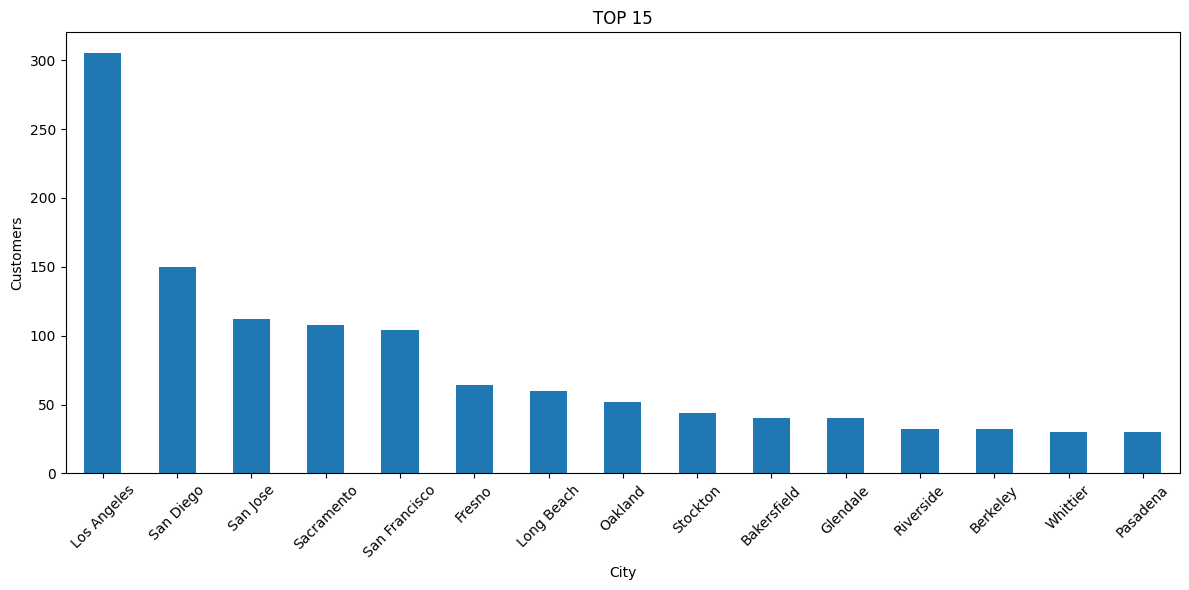

In [210]:
top_cities = df["City"].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_cities.plot(kind="bar")
plt.title("TOP 15")
plt.xlabel("City")
plt.ylabel("Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

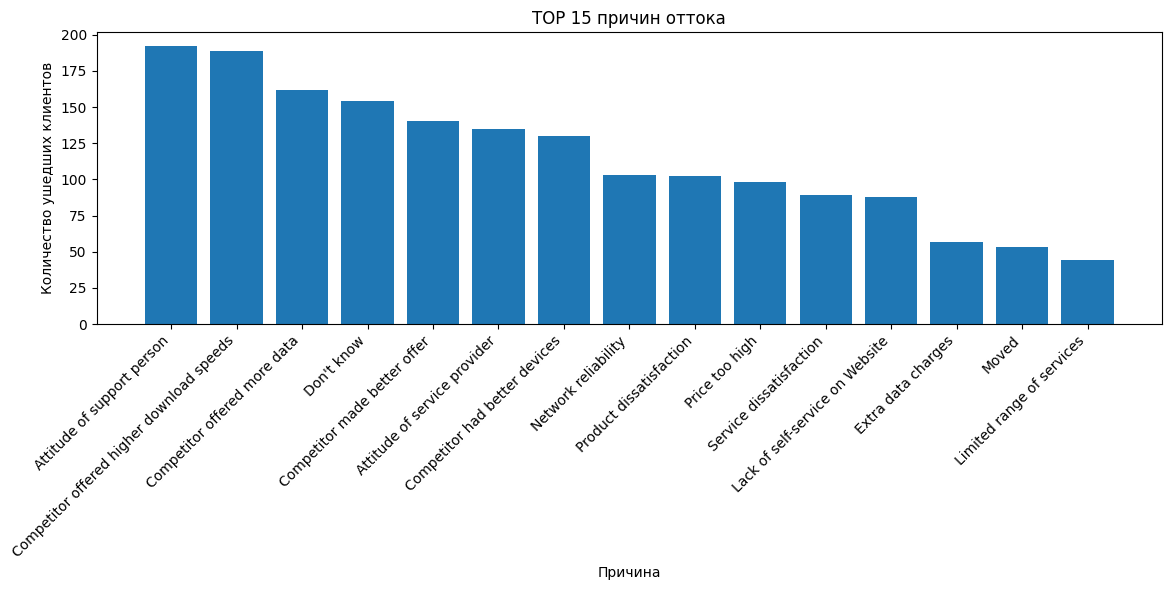

In [211]:
plt.figure(figsize=(12, 6))
top_reasons = df["Churn Reason"].dropna().value_counts().head(15)

plt.bar(top_reasons.index, top_reasons.values)
plt.title("TOP 15 причин оттока")
plt.xlabel("Причина")
plt.ylabel("Количество ушедших клиентов")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [212]:
df["Total Charges"].fillna(value=df["Total Charges"].median(), inplace=True)
df["Churn Reason"].fillna(value=" ", inplace=True)


/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/783752211.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/783752211.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df


Tenure Months:
  Тип данных: int64
  Уникальные значения: [ 2  8 28 49 10  1 47 17  5 34]
  Пропуски: 0
  Строковых значений: 0

Monthly Charges:
  Тип данных: float64
  Уникальные значения: [ 53.85  70.7   99.65 104.8  103.7   55.2   39.65  20.15  99.35  30.2 ]
  Пропуски: 0
  Строковых значений: 0

Total Charges:
  Тип данных: float64
  Уникальные значения: [ 108.15  151.65  820.5  3046.05 5036.3   528.35   39.65   20.15 4749.15
   30.2 ]
  Пропуски: 0
  Строковых значений: 0

Churn Score:
  Тип данных: int64
  Уникальные значения: [ 86  67  84  89  78 100  92  77  97  74]
  Пропуски: 0
  Строковых значений: 0

CLTV:
  Тип данных: int64
  Уникальные значения: [3239 2701 5372 5003 5340 5925 5433 4832 5789 2915]
  Пропуски: 0
  Строковых значений: 0


<Figure size 1200x800 with 0 Axes>

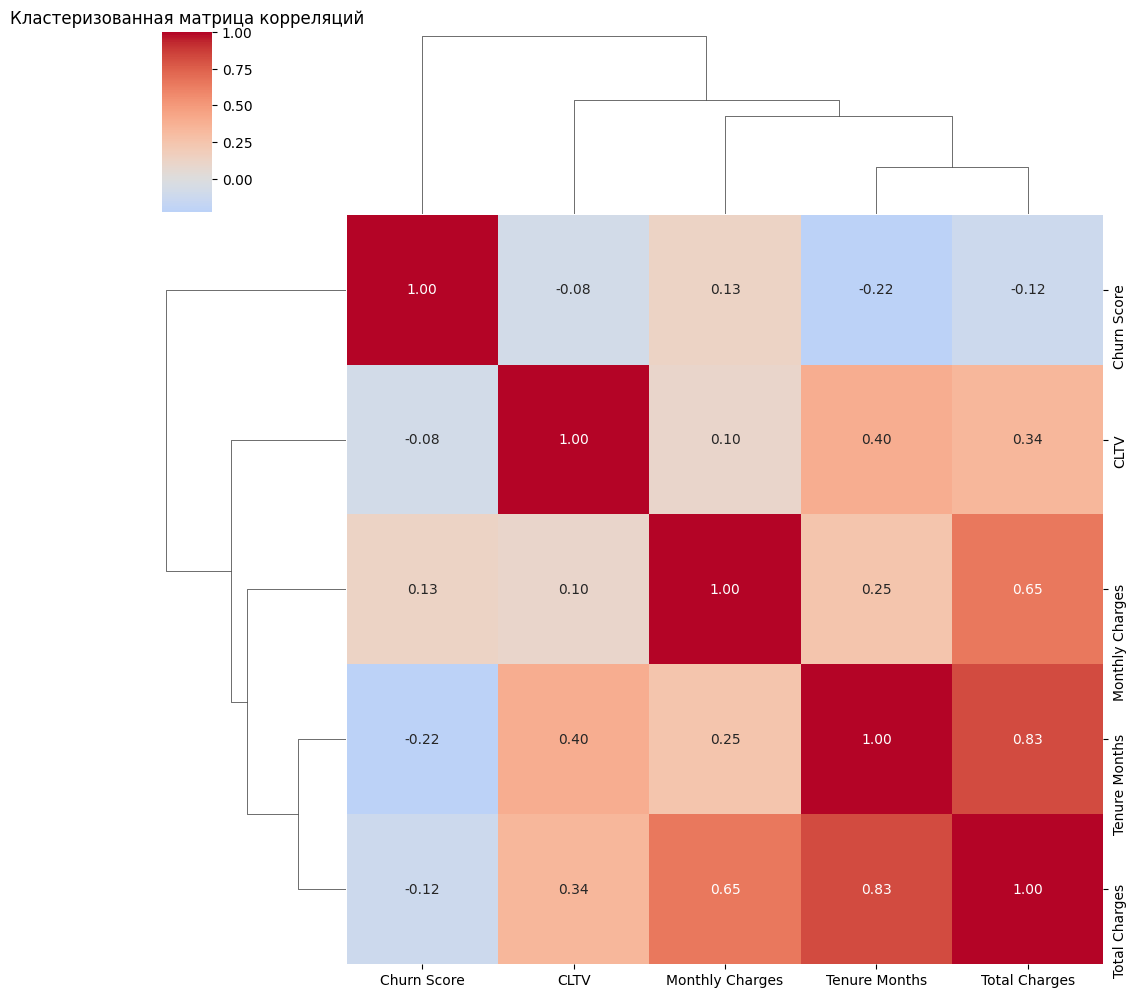

In [213]:
numeric_columns = [ 
    "Tenure Months",
    "Monthly Charges", 
    "Total Charges",
    "Churn Score",
    "CLTV"
]


for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  Тип данных: {df[col].dtype}")
    print(f"  Уникальные значения: {df[col].unique()[:10]}")
    print(f"  Пропуски: {df[col].isnull().sum()}")
    
    string_values = df[col].apply(lambda x: isinstance(x, str)).sum()
    print(f"  Строковых значений: {string_values}")



numeric_df = df[numeric_columns]
plt.figure(figsize=(12, 8))
sns.clustermap(
    numeric_df.corr(), 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt='.2f'
)

plt.title('Кластеризованная матрица корреляций')
plt.show()

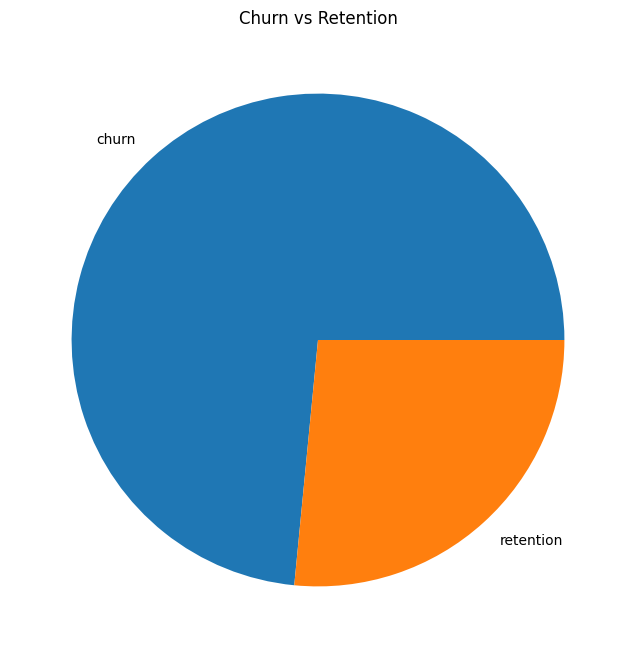

In [214]:
plt.figure(figsize=(12, 8))
plt.pie(
    x = df["Churn Label"].value_counts(),
    labels = ["churn", "retention"]
)

plt.title('Churn vs Retention')
plt.show()

In [215]:
df.head()

City  Zip Code  Gender Senior Citizen Partner Dependents  \
0  Los Angeles     90003    Male             No      No         No   
1  Los Angeles     90005  Female             No      No        Yes   
2  Los Angeles     90006  Female             No      No        Yes   
3  Los Angeles     90010  Female             No     Yes        Yes   
4  Los Angeles     90015    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  \
0              2           Yes             No              DSL   
1              2           Yes             No      Fiber optic   
2              8           Yes            Yes      Fiber optic   
3             28           Yes            Yes      Fiber optic   
4             49           Yes            Yes      Fiber optic   

  Online Security Online Backup Device Protection Tech Support Streaming TV  \
0             Yes           Yes                No           No           No   
1              No            No                No           No           No   
2              No            No               Yes           No          Yes   
3              No            No               Yes          Yes          Yes   
4              No           Yes               Yes           No          Yes   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method  Monthly Charges  Total Charges Churn Label  \
0               Mailed check            53.85         108.15         Yes   
1           Electronic check            70.70         151.65         Yes   
2           Electronic check            99.65         820.50         Yes   
3           Electronic check           104.80        3046.05         Yes   
4  Bank transfer (automatic)           103.70        5036.30         Yes   

   Churn Value  Churn Score  CLTV                   Churn Reason  
0            1           86  3239   Competitor made better offer  
1            1           67  2701                          Moved  
2            1           86  5372                          Moved  
3            1           84  5003                          Moved  
4            1           89  5340  Competitor had better devices

In [216]:
df1 = df[df["Churn Label"] == "Yes"]
df1.shape

(1869, 26)

In [217]:
df2 = df[df["Churn Label"] == "No"]
df2.shape

(5174, 26)

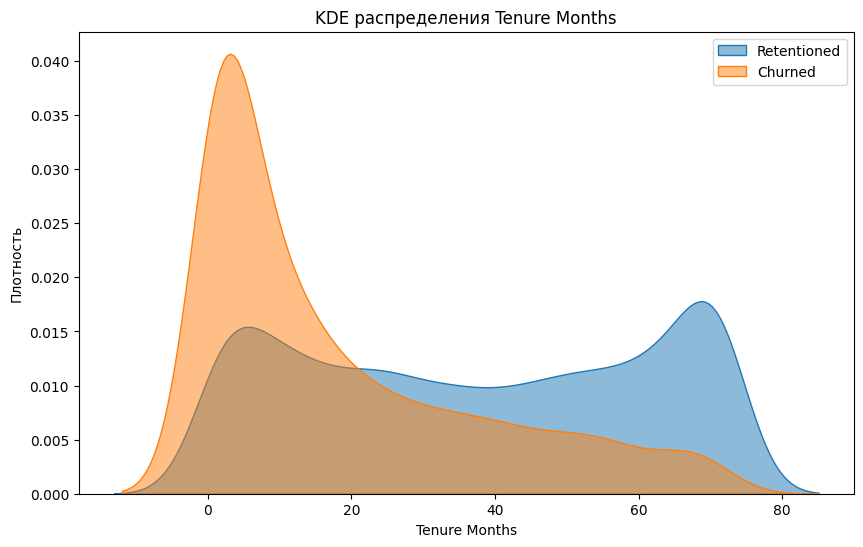

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/3690978791.py:19: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



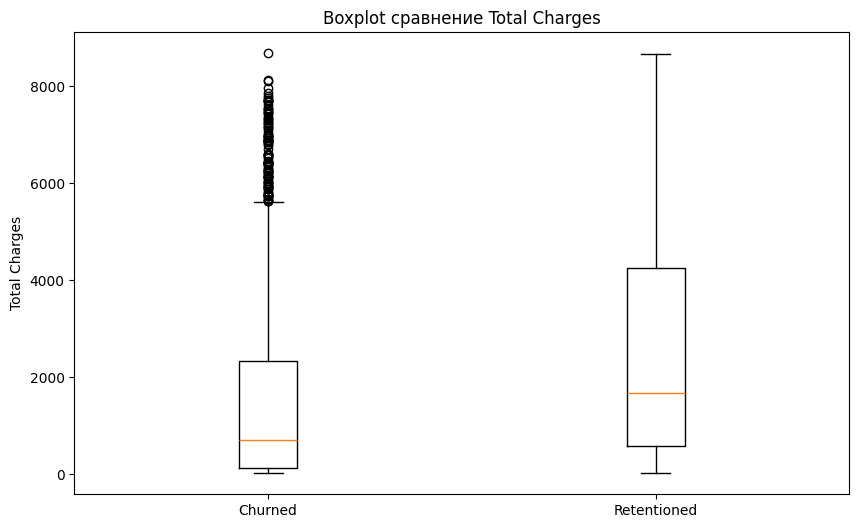

In [218]:
plt.figure(figsize=(10, 6))

sns.kdeplot(x = df2['Tenure Months'], label='Retentioned', fill=True, alpha=0.5)
sns.kdeplot(x = df1['Tenure Months'], label='Churned', fill=True, alpha=0.5)

plt.xlabel('Tenure Months')
plt.ylabel('Плотность')
plt.title('KDE распределения Tenure Months')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))


data_to_plot = [df1['Total Charges'].dropna(), df2['Total Charges'].dropna()]
labels = ['Churned', 'Retentioned']

plt.boxplot(data_to_plot, labels=labels)
plt.ylabel('Total Charges')
plt.title('Boxplot сравнение Total Charges')
plt.show()

In [219]:
df.head()

City  Zip Code  Gender Senior Citizen Partner Dependents  \
0  Los Angeles     90003    Male             No      No         No   
1  Los Angeles     90005  Female             No      No        Yes   
2  Los Angeles     90006  Female             No      No        Yes   
3  Los Angeles     90010  Female             No     Yes        Yes   
4  Los Angeles     90015    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  \
0              2           Yes             No              DSL   
1              2           Yes             No      Fiber optic   
2              8           Yes            Yes      Fiber optic   
3             28           Yes            Yes      Fiber optic   
4             49           Yes            Yes      Fiber optic   

  Online Security Online Backup Device Protection Tech Support Streaming TV  \
0             Yes           Yes                No           No           No   
1              No            No                No           No           No   
2              No            No               Yes           No          Yes   
3              No            No               Yes          Yes          Yes   
4              No           Yes               Yes           No          Yes   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method  Monthly Charges  Total Charges Churn Label  \
0               Mailed check            53.85         108.15         Yes   
1           Electronic check            70.70         151.65         Yes   
2           Electronic check            99.65         820.50         Yes   
3           Electronic check           104.80        3046.05         Yes   
4  Bank transfer (automatic)           103.70        5036.30         Yes   

   Churn Value  Churn Score  CLTV                   Churn Reason  
0            1           86  3239   Competitor made better offer  
1            1           67  2701                          Moved  
2            1           86  5372                          Moved  
3            1           84  5003                          Moved  
4            1           89  5340  Competitor had better devices

In [220]:
numeric_columns = [ 
    "Tenure Months",
    "Monthly Charges", 
    "Total Charges",
    "Churn Score",
    "CLTV"
]


categorial_columns = list(set(df.columns) - set(numeric_columns))

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:32: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.





=== АНАЛИЗ ПРИЗНАКА: Tenure Months ===
Статистики для Churned:
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tenure Months, dtype: float64

Статистики для Retentioned:
count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tenure Months, dtype: float64


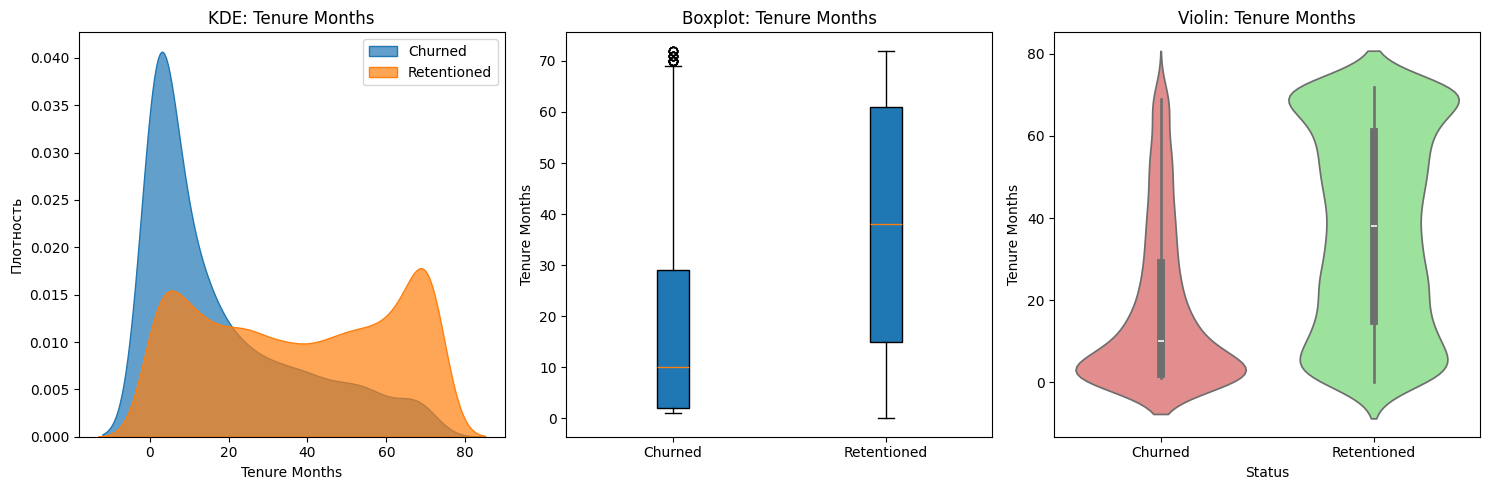


=== АНАЛИЗ ПРИЗНАКА: Monthly Charges ===
Статистики для Churned:
count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: Monthly Charges, dtype: float64

Статистики для Retentioned:
count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: Monthly Charges, dtype: float64


/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:32: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




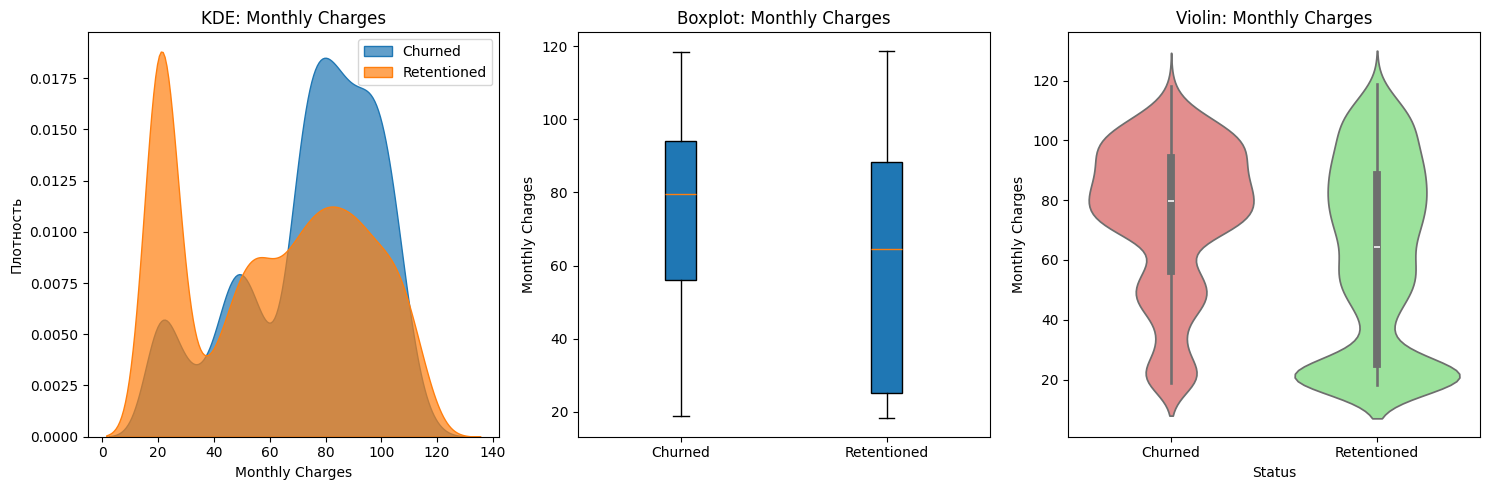


=== АНАЛИЗ ПРИЗНАКА: Total Charges ===
Статистики для Churned:
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: Total Charges, dtype: float64

Статистики для Retentioned:
count    5174.000000
mean     2552.882494
std      2327.590132
min        18.800000
25%       579.575000
50%      1679.525000
75%      4262.850000
max      8672.450000
Name: Total Charges, dtype: float64


/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:32: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




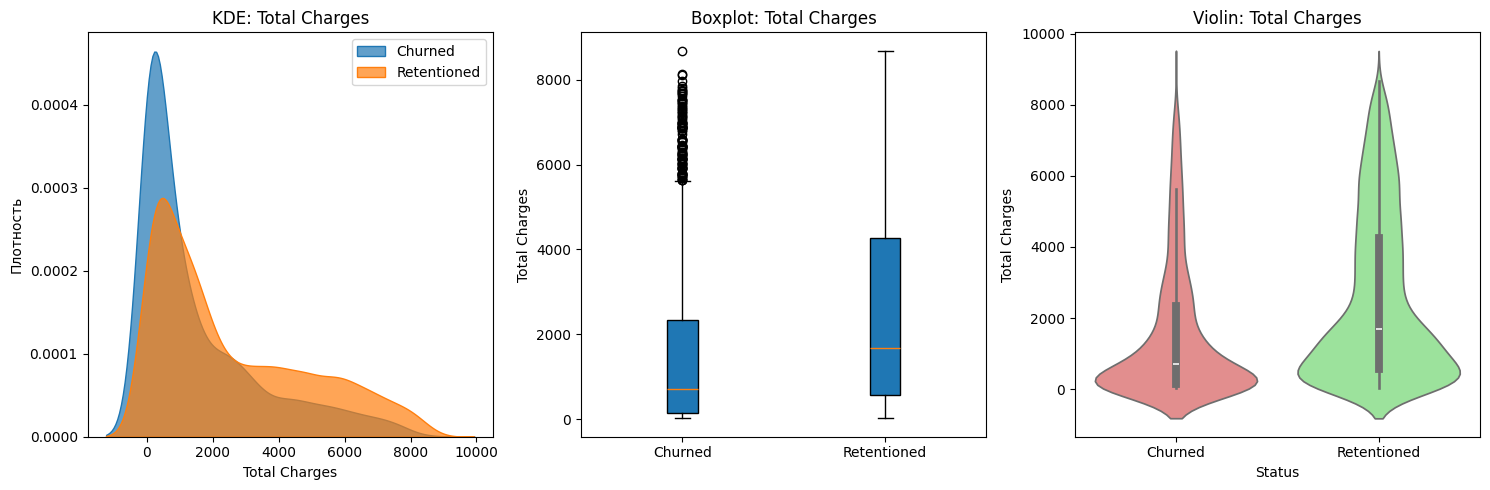


=== АНАЛИЗ ПРИЗНАКА: Churn Score ===
Статистики для Churned:
count    1869.000000
mean       82.510433
std        10.328570
min        65.000000
25%        74.000000
50%        82.000000
75%        91.000000
max       100.000000
Name: Churn Score, dtype: float64

Статистики для Retentioned:
count    5174.000000
mean       50.098183
std        17.702277
min         5.000000
25%        35.000000
50%        50.000000
75%        66.000000
max        80.000000
Name: Churn Score, dtype: float64


/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:32: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




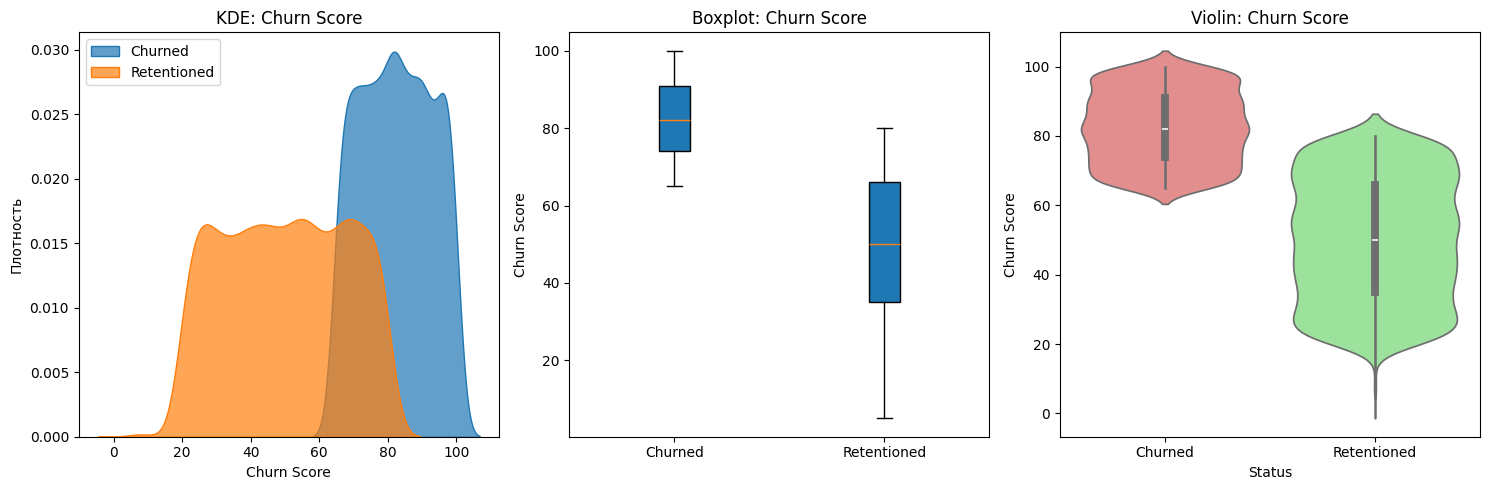


=== АНАЛИЗ ПРИЗНАКА: CLTV ===
Статистики для Churned:
count    1869.000000
mean     4149.414660
std      1189.370707
min      2003.000000
25%      3101.000000
50%      4238.000000
75%      5166.000000
max      6484.000000
Name: CLTV, dtype: float64

Статистики для Retentioned:
count    5174.000000
mean     4490.921337
std      1167.703198
min      2003.000000
25%      3643.750000
50%      4620.000000
75%      5434.750000
max      6500.000000
Name: CLTV, dtype: float64


/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:32: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2083628793.py:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




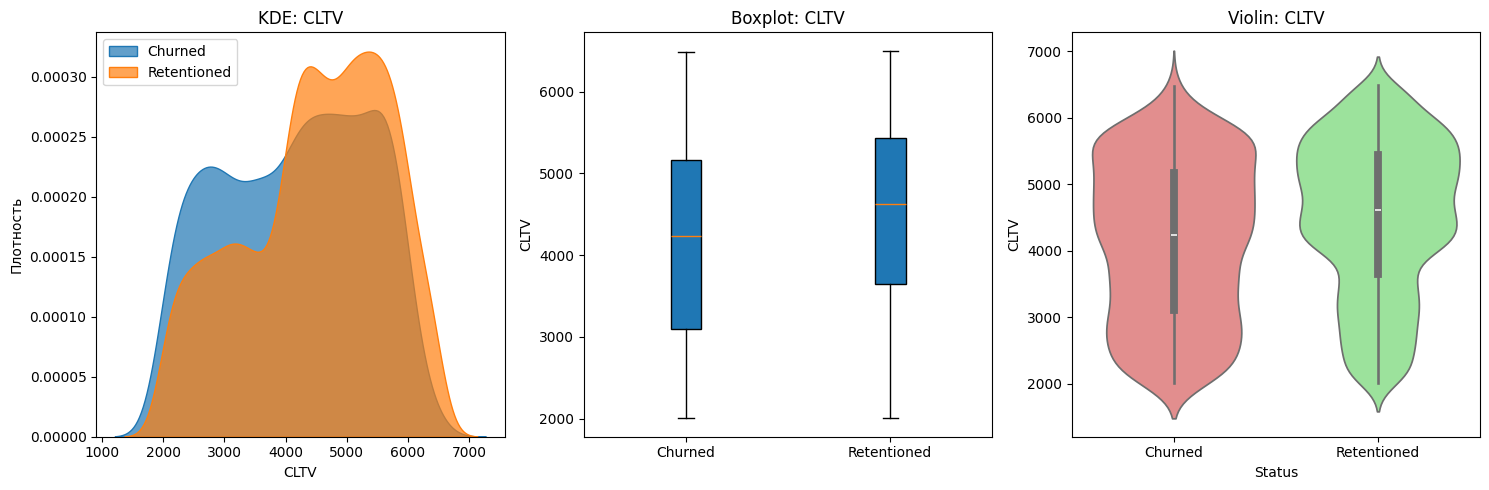


=== АНАЛИЗ ПРИЗНАКА: Senior Citizen ===


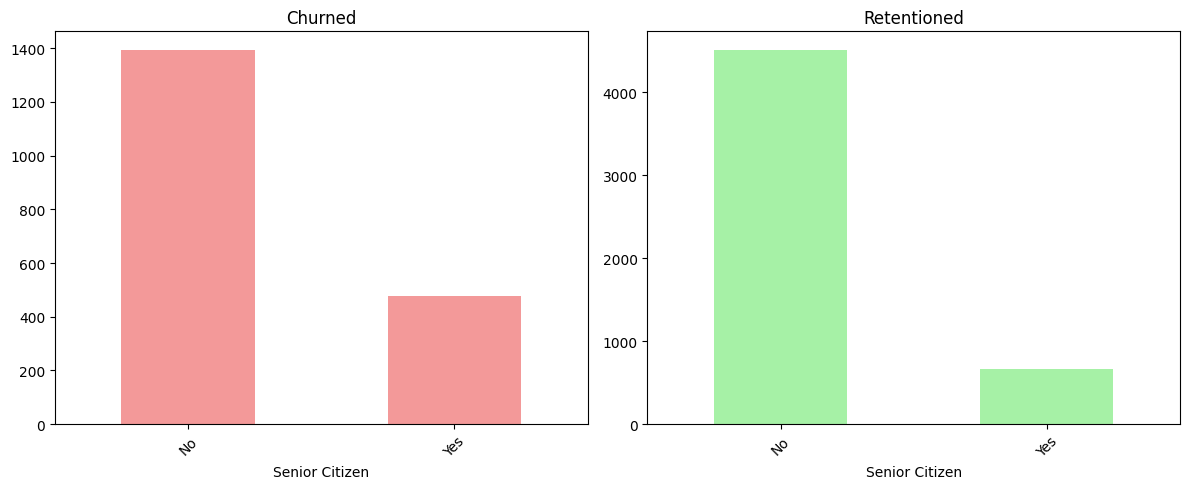


=== АНАЛИЗ ПРИЗНАКА: Online Backup ===


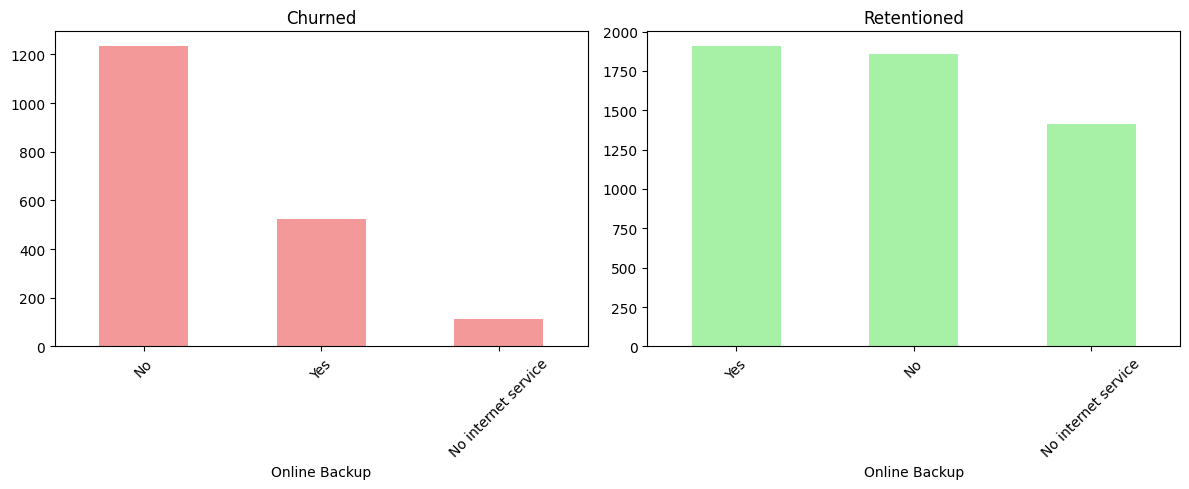


=== АНАЛИЗ ПРИЗНАКА: Internet Service ===


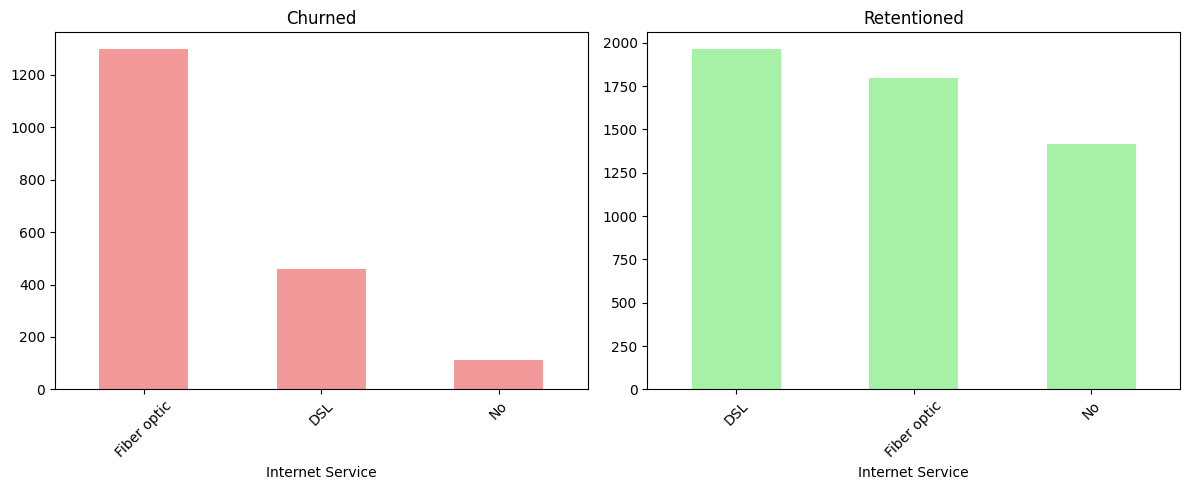


=== АНАЛИЗ ПРИЗНАКА: City ===


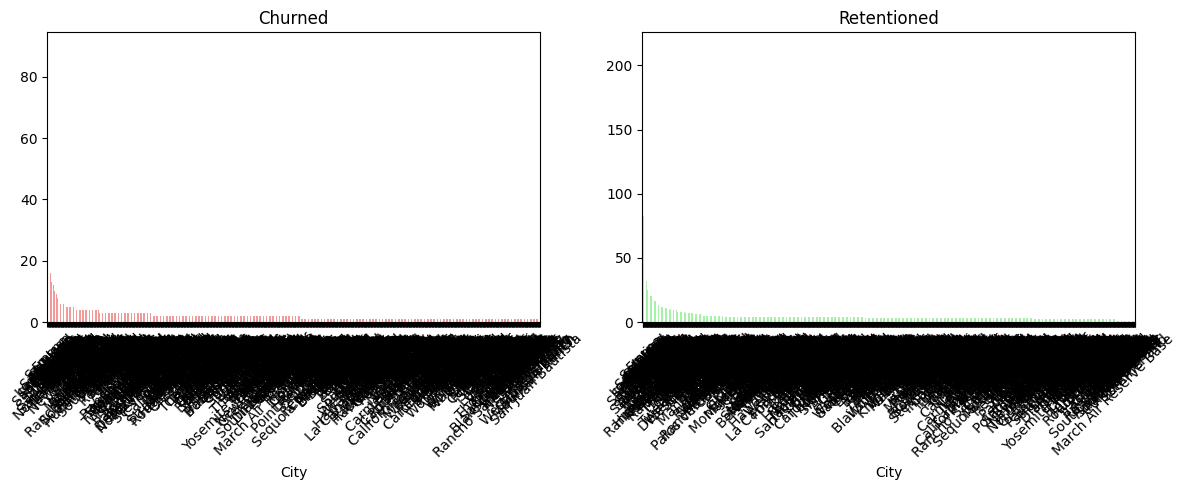


=== АНАЛИЗ ПРИЗНАКА: Dependents ===


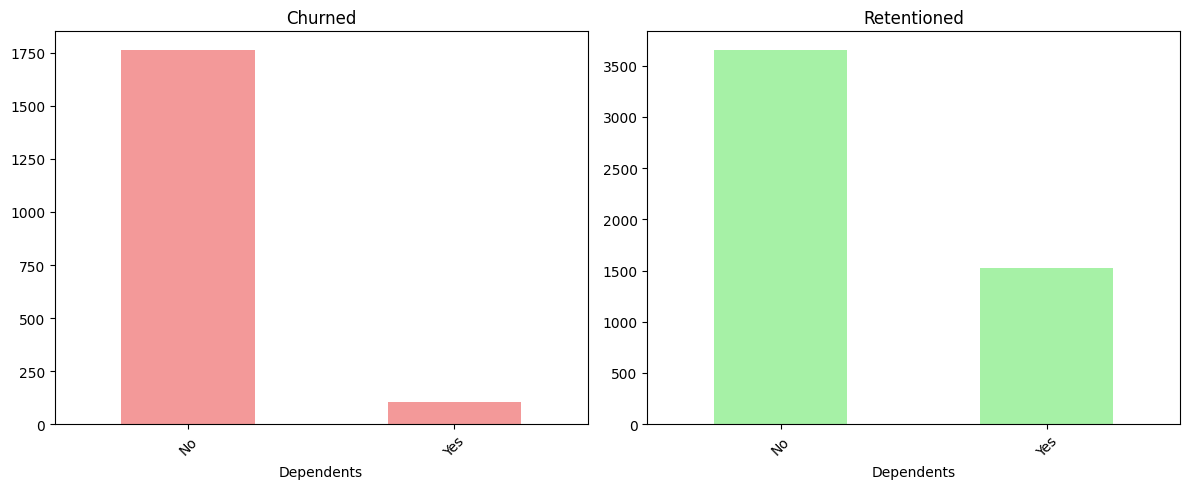


=== АНАЛИЗ ПРИЗНАКА: Churn Label ===


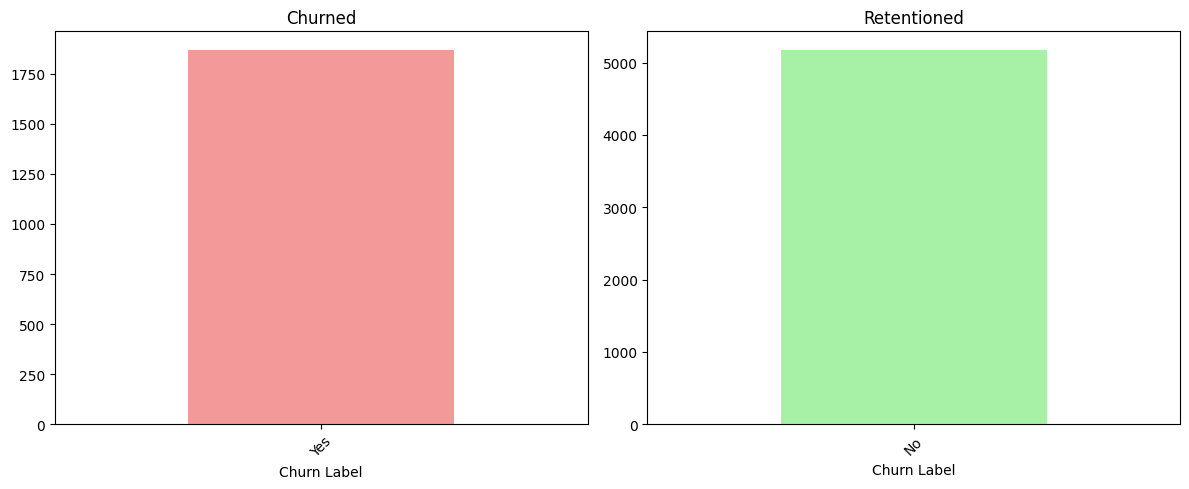


=== АНАЛИЗ ПРИЗНАКА: Streaming TV ===


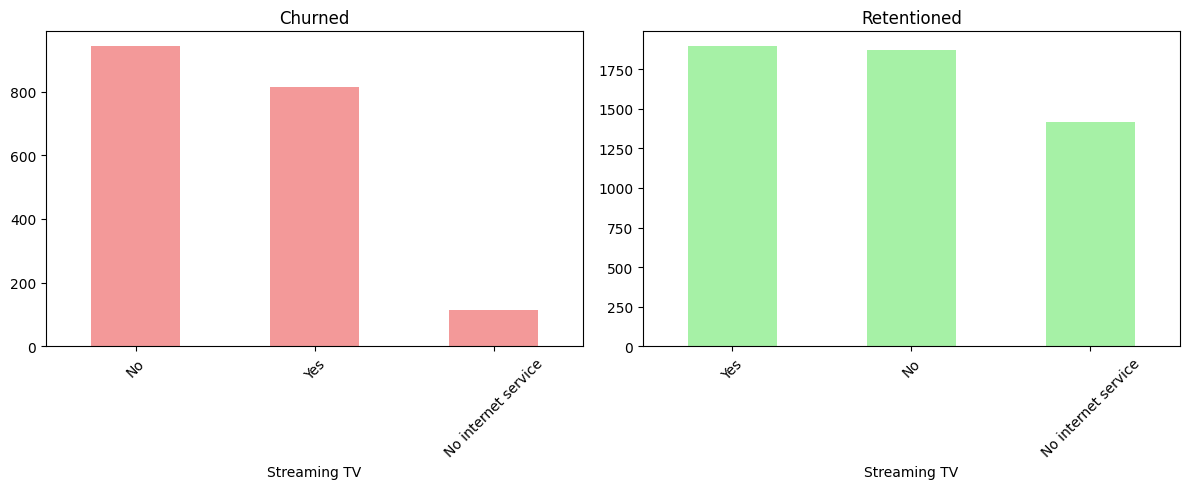


=== АНАЛИЗ ПРИЗНАКА: Multiple Lines ===


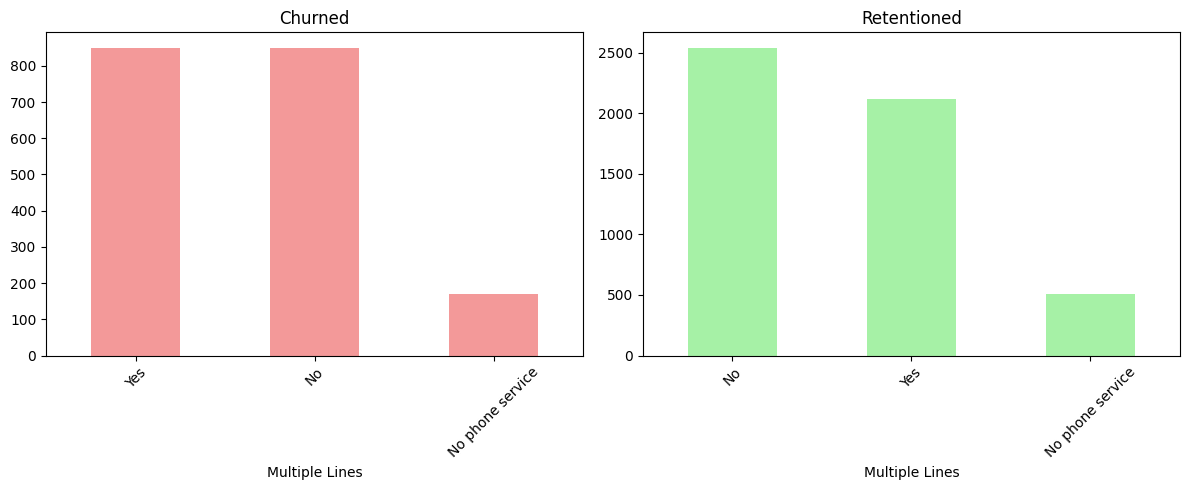


=== АНАЛИЗ ПРИЗНАКА: Device Protection ===


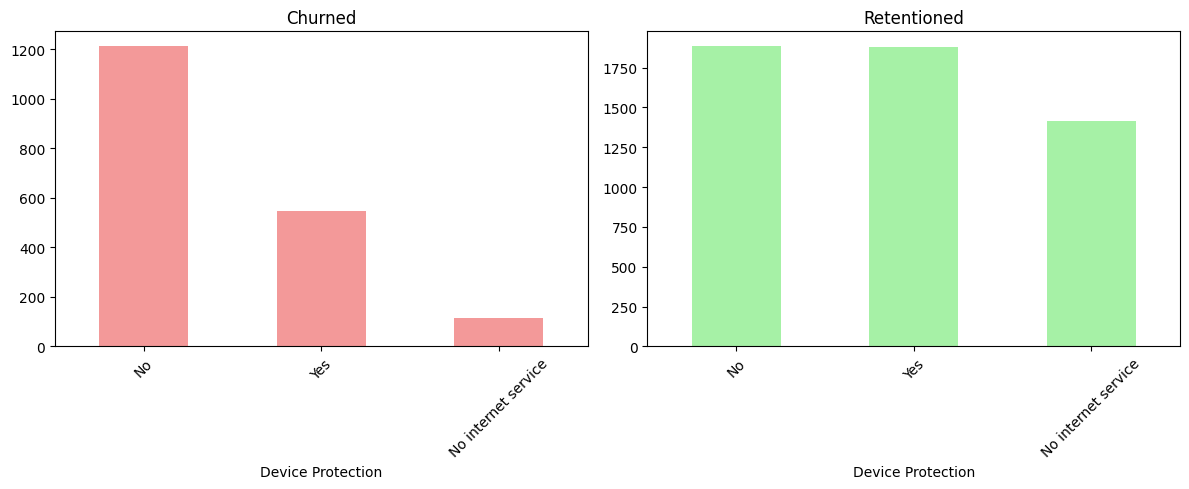


=== АНАЛИЗ ПРИЗНАКА: Churn Reason ===


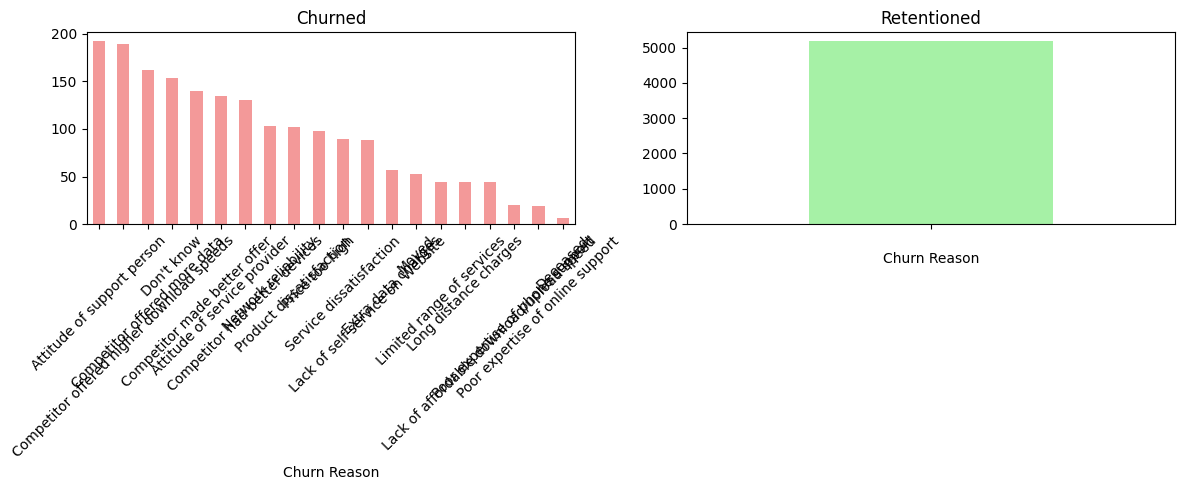


=== АНАЛИЗ ПРИЗНАКА: Payment Method ===


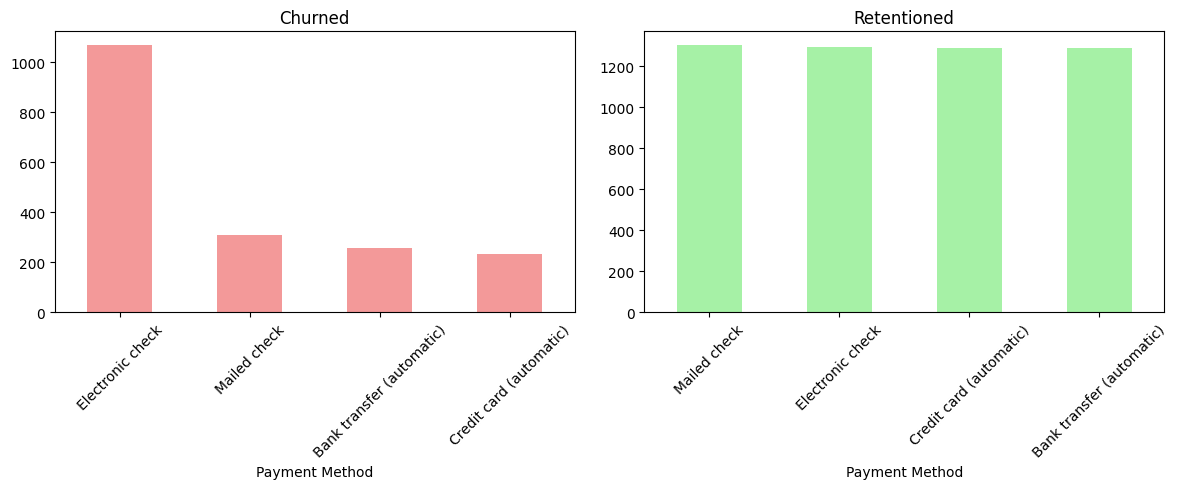


=== АНАЛИЗ ПРИЗНАКА: Tech Support ===


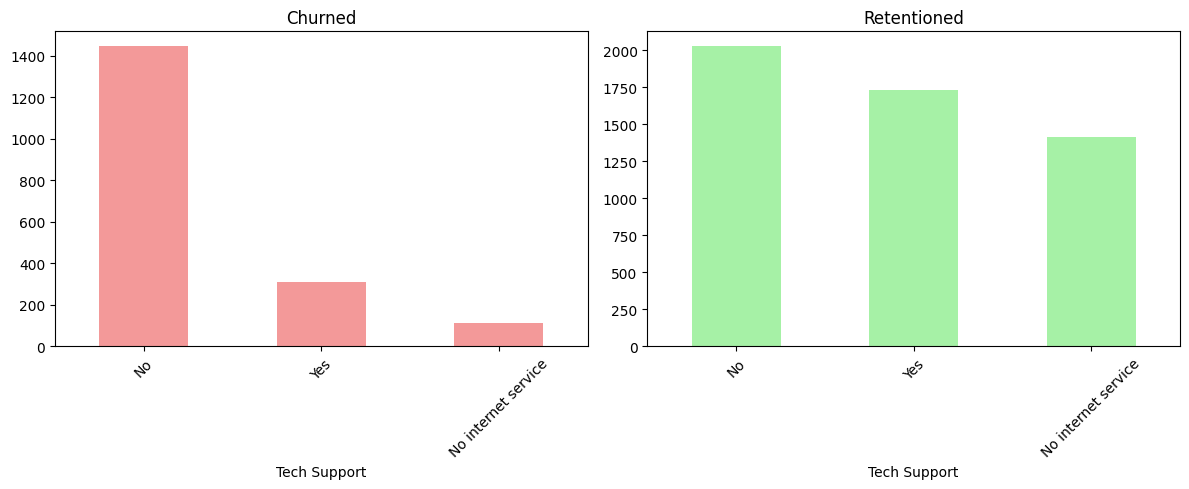


=== АНАЛИЗ ПРИЗНАКА: Phone Service ===


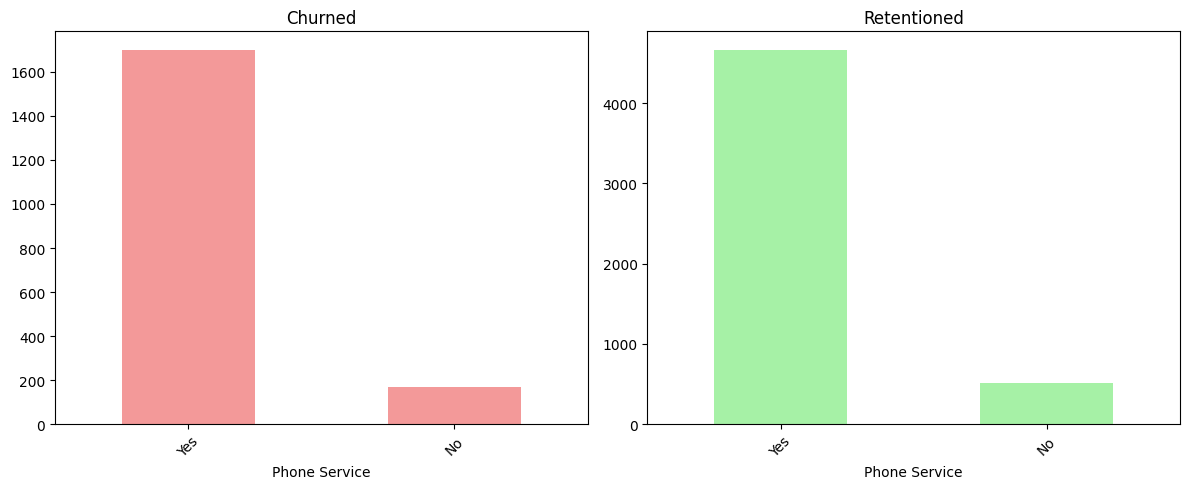


=== АНАЛИЗ ПРИЗНАКА: Gender ===


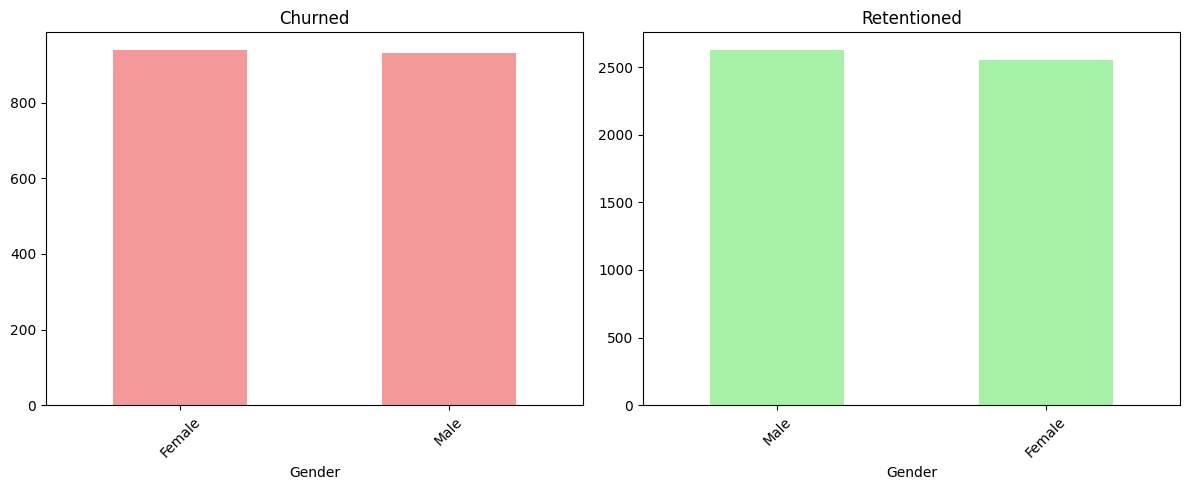


=== АНАЛИЗ ПРИЗНАКА: Partner ===


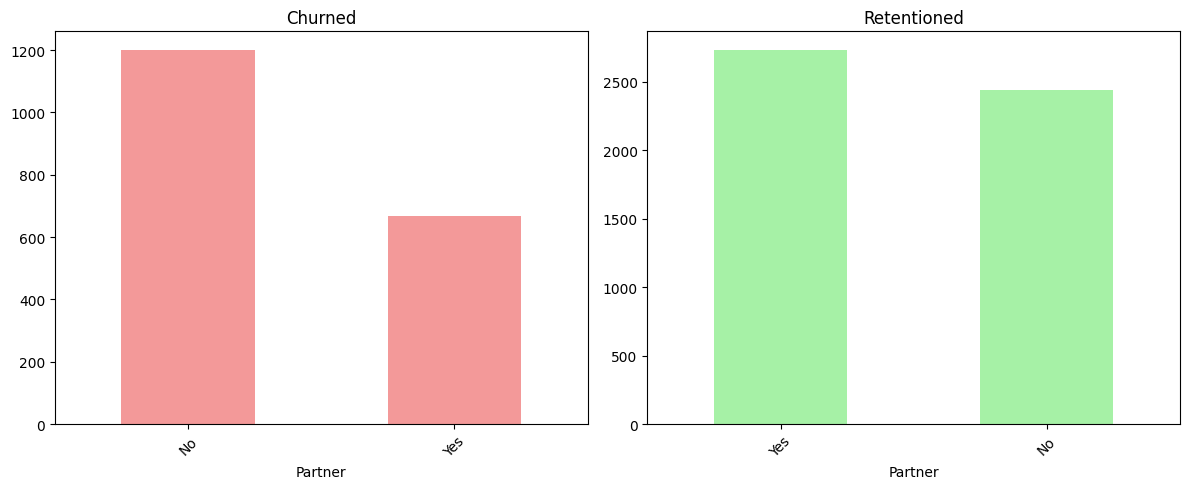


=== АНАЛИЗ ПРИЗНАКА: Paperless Billing ===


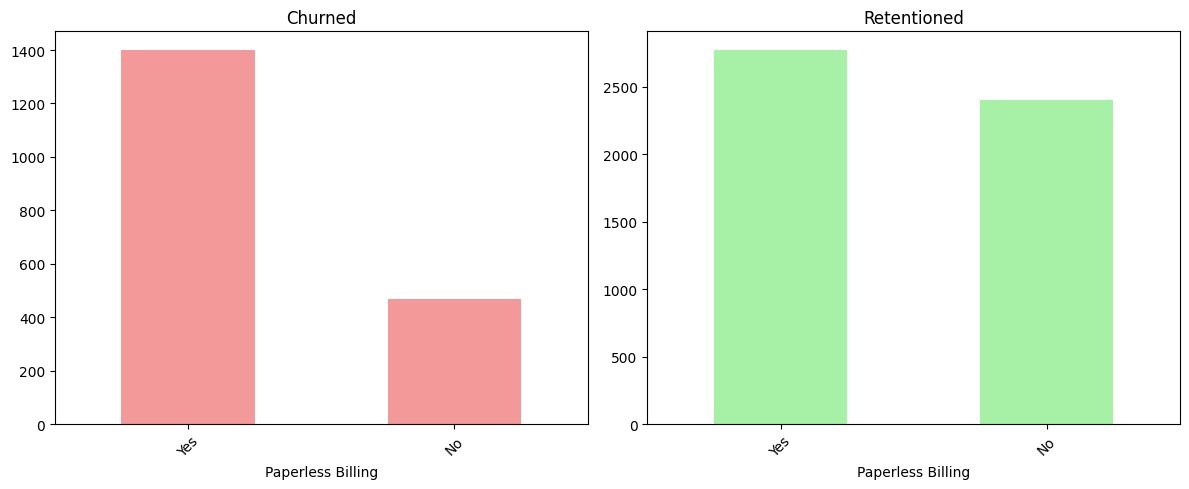


=== АНАЛИЗ ПРИЗНАКА: Zip Code ===


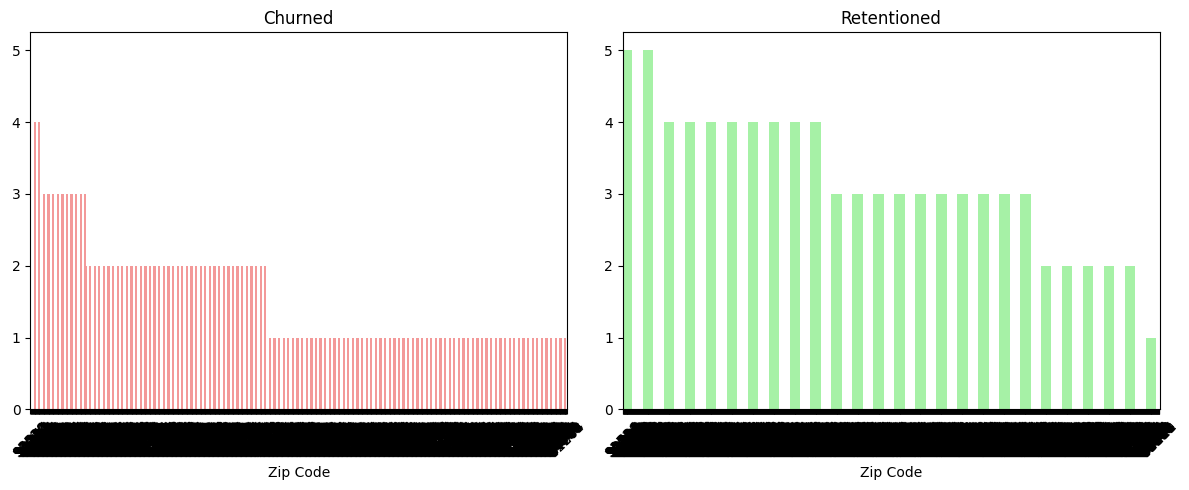


=== АНАЛИЗ ПРИЗНАКА: Online Security ===


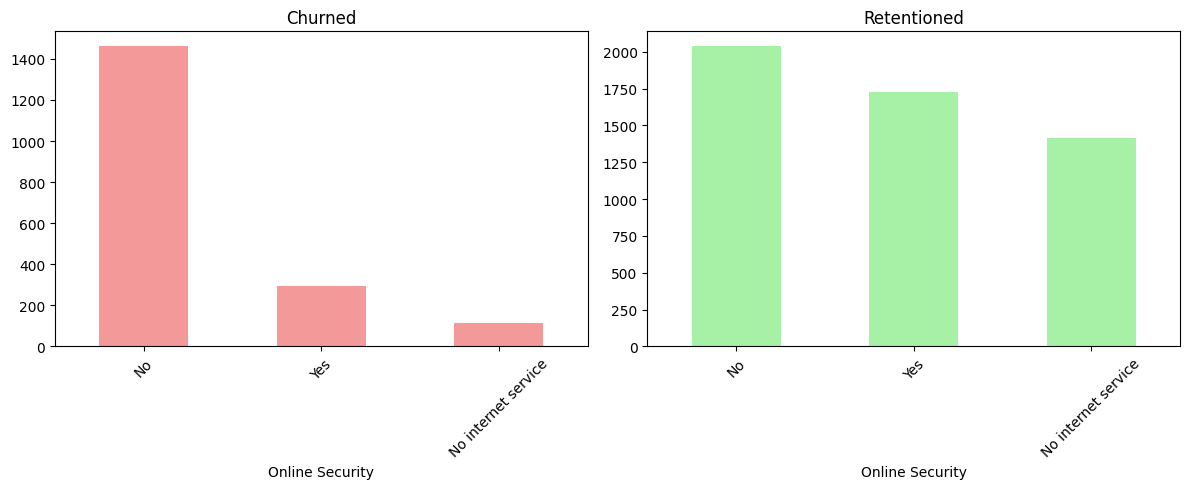


=== АНАЛИЗ ПРИЗНАКА: Streaming Movies ===


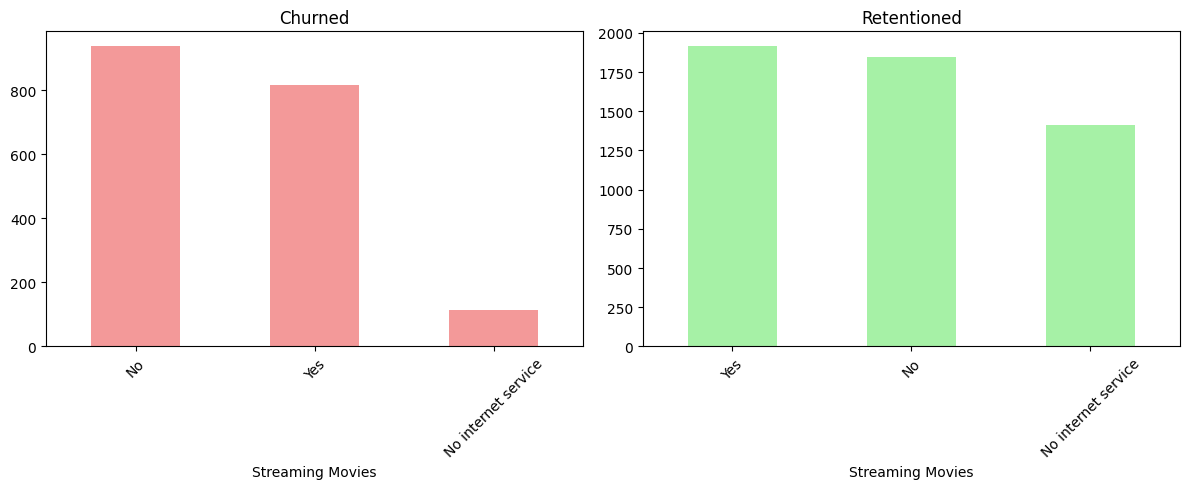


=== АНАЛИЗ ПРИЗНАКА: Churn Value ===


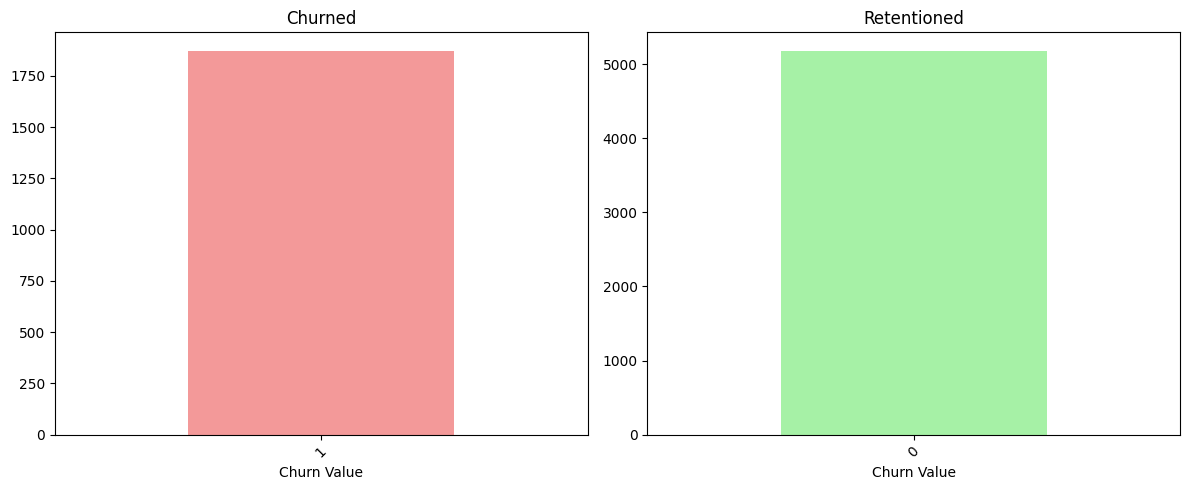


=== АНАЛИЗ ПРИЗНАКА: Contract ===


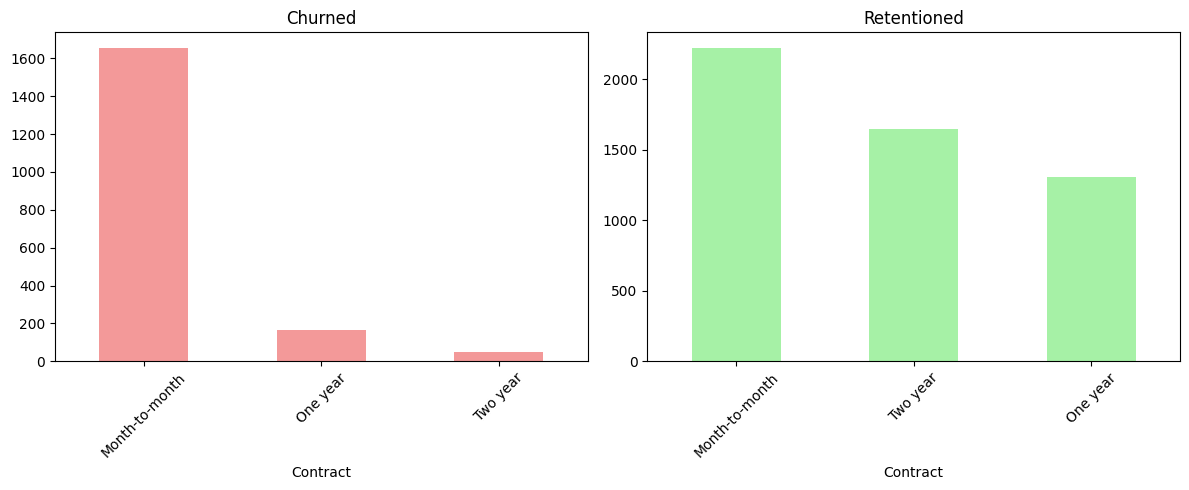

In [221]:
def build_analysis_improved(features: list, feature_type: str = 'numeric'):
    """
    Улучшенная версия с дополнительной статистикой
    """
    
    for feature in features:
        if feature not in df1.columns or feature not in df2.columns:
            print(f"Признак {feature} не найден")
            continue
            
        print(f"\n=== АНАЛИЗ ПРИЗНАКА: {feature} ===")
        
        if feature_type == 'numeric':
            print("Статистики для Churned:")
            print(df1[feature].describe())
            print("\nСтатистики для Retentioned:")
            print(df2[feature].describe())

            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            sns.kdeplot(x=df1[feature].dropna(), label='Churned', fill=True, alpha=0.7)
            sns.kdeplot(x=df2[feature].dropna(), label='Retentioned', fill=True, alpha=0.7)
            plt.xlabel(feature)
            plt.ylabel('Плотность')
            plt.title(f'KDE: {feature}')
            plt.legend()
            
            plt.subplot(1, 3, 2)
            data_to_plot = [df1[feature].dropna(), df2[feature].dropna()]
            labels = ['Churned', 'Retentioned']
            plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
            colors = ['lightcoral', 'lightgreen']
            for patch, color in zip(plt.gca().artists, colors):
                patch.set_facecolor(color)
            plt.ylabel(feature)
            plt.title(f'Boxplot: {feature}')
            
            plt.subplot(1, 3, 3)
            combined_df = pd.concat([
                df1[feature].to_frame().assign(Status='Churned'),
                df2[feature].to_frame().assign(Status='Retentioned')
            ])
            sns.violinplot(data=combined_df, x='Status', y=feature, palette=['lightcoral', 'lightgreen'])
            plt.title(f'Violin: {feature}')
            
            plt.tight_layout()
            plt.show()
            
        elif feature_type == 'categorical':
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            df1[feature].value_counts().plot(kind='bar', color='lightcoral', alpha=0.8)
            plt.title('Churned')
            plt.xticks(rotation=45)
            
            plt.subplot(1, 2, 2) 
            df2[feature].value_counts().plot(kind='bar', color='lightgreen', alpha=0.8)
            plt.title('Retentioned')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()


build_analysis_improved(numeric_columns, 'numeric')
build_analysis_improved(categorial_columns, 'categorical')

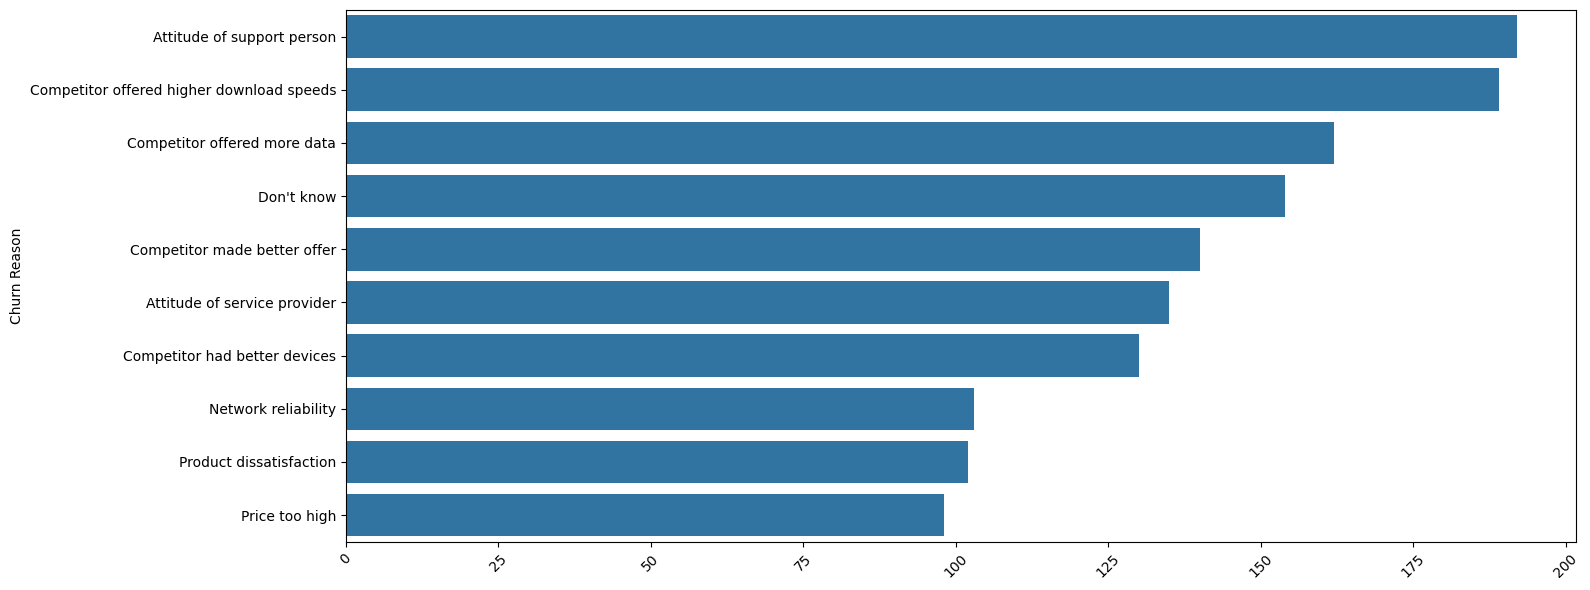

In [222]:
plt.figure(figsize=(16, 6))
sns.barplot(
    y=df1['Churn Reason'].value_counts().head(10).index,
    x=df1['Churn Reason'].value_counts().head(10).values,
    orient="h"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [223]:
df.head()

City  Zip Code  Gender Senior Citizen Partner Dependents  \
0  Los Angeles     90003    Male             No      No         No   
1  Los Angeles     90005  Female             No      No        Yes   
2  Los Angeles     90006  Female             No      No        Yes   
3  Los Angeles     90010  Female             No     Yes        Yes   
4  Los Angeles     90015    Male             No      No        Yes   

   Tenure Months Phone Service Multiple Lines Internet Service  \
0              2           Yes             No              DSL   
1              2           Yes             No      Fiber optic   
2              8           Yes            Yes      Fiber optic   
3             28           Yes            Yes      Fiber optic   
4             49           Yes            Yes      Fiber optic   

  Online Security Online Backup Device Protection Tech Support Streaming TV  \
0             Yes           Yes                No           No           No   
1              No            No                No           No           No   
2              No            No               Yes           No          Yes   
3              No            No               Yes          Yes          Yes   
4              No           Yes               Yes           No          Yes   

  Streaming Movies        Contract Paperless Billing  \
0               No  Month-to-month               Yes   
1               No  Month-to-month               Yes   
2              Yes  Month-to-month               Yes   
3              Yes  Month-to-month               Yes   
4              Yes  Month-to-month               Yes   

              Payment Method  Monthly Charges  Total Charges Churn Label  \
0               Mailed check            53.85         108.15         Yes   
1           Electronic check            70.70         151.65         Yes   
2           Electronic check            99.65         820.50         Yes   
3           Electronic check           104.80        3046.05         Yes   
4  Bank transfer (automatic)           103.70        5036.30         Yes   

   Churn Value  Churn Score  CLTV                   Churn Reason  
0            1           86  3239   Competitor made better offer  
1            1           67  2701                          Moved  
2            1           86  5372                          Moved  
3            1           84  5003                          Moved  
4            1           89  5340  Competitor had better devices

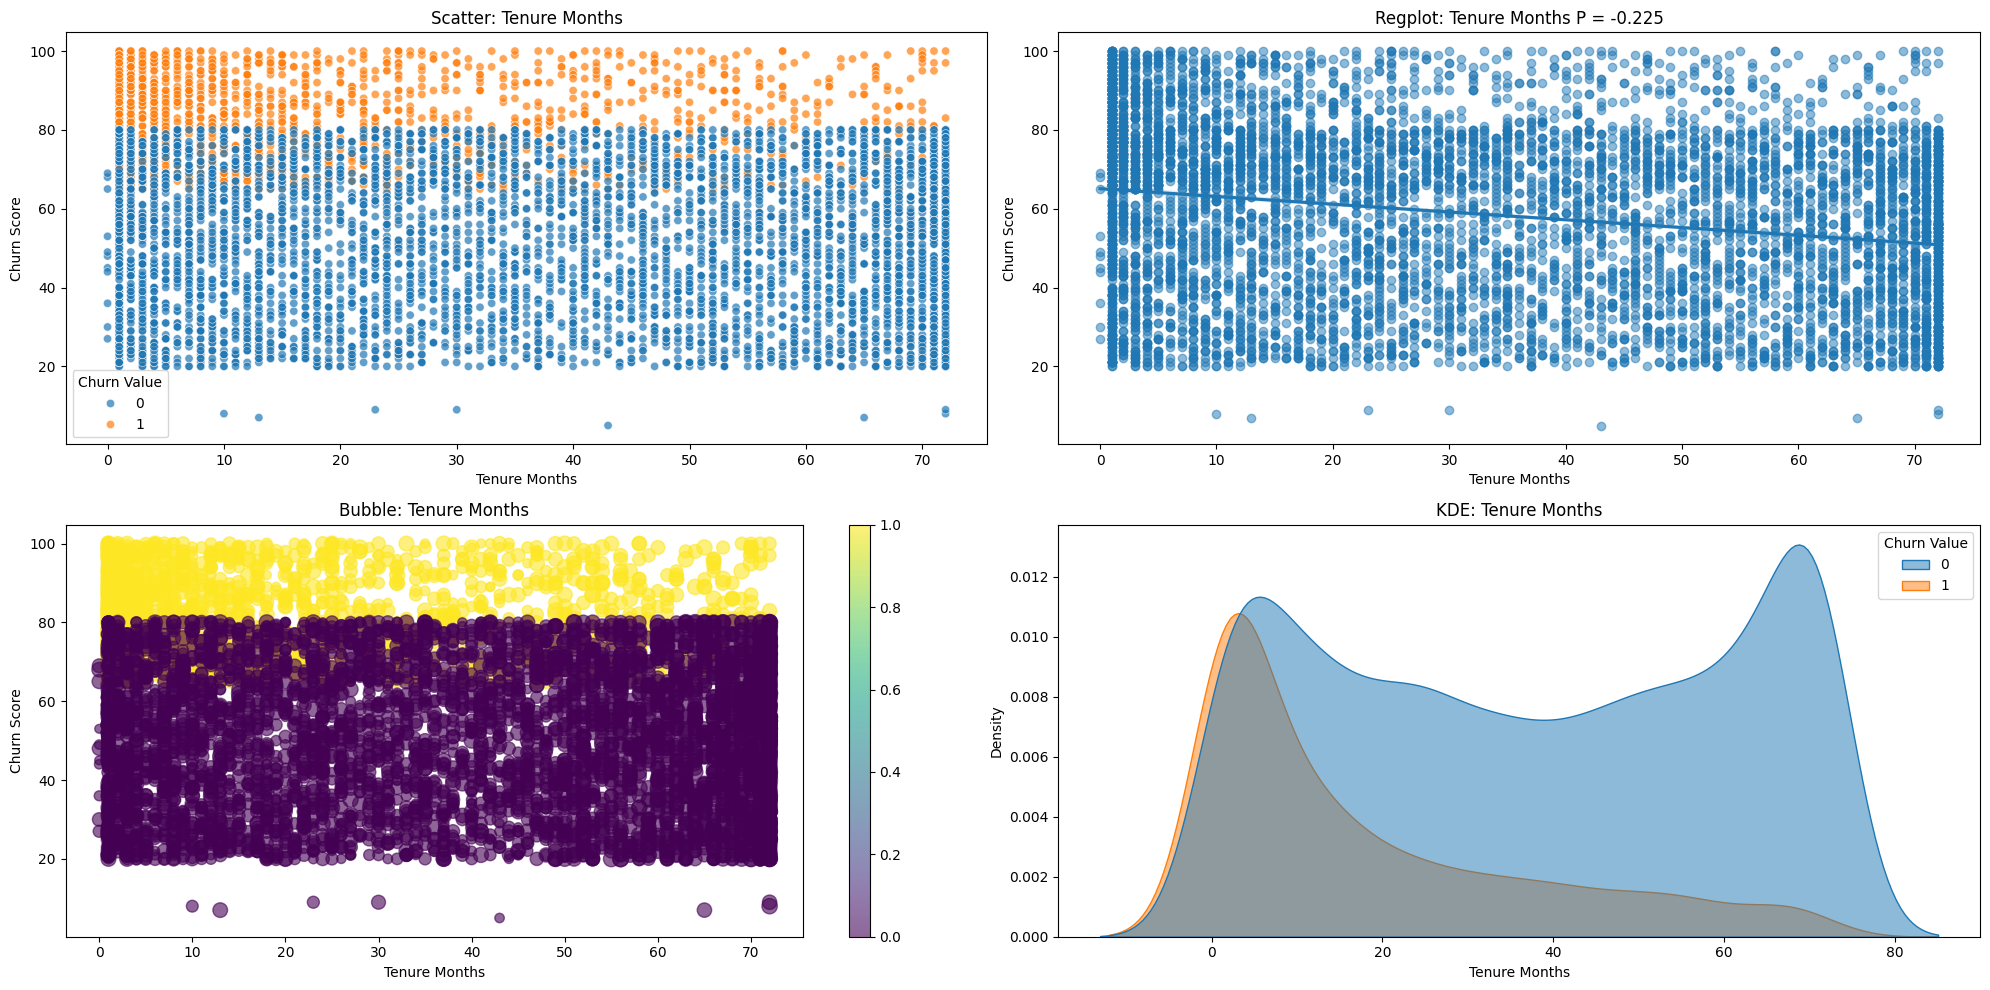

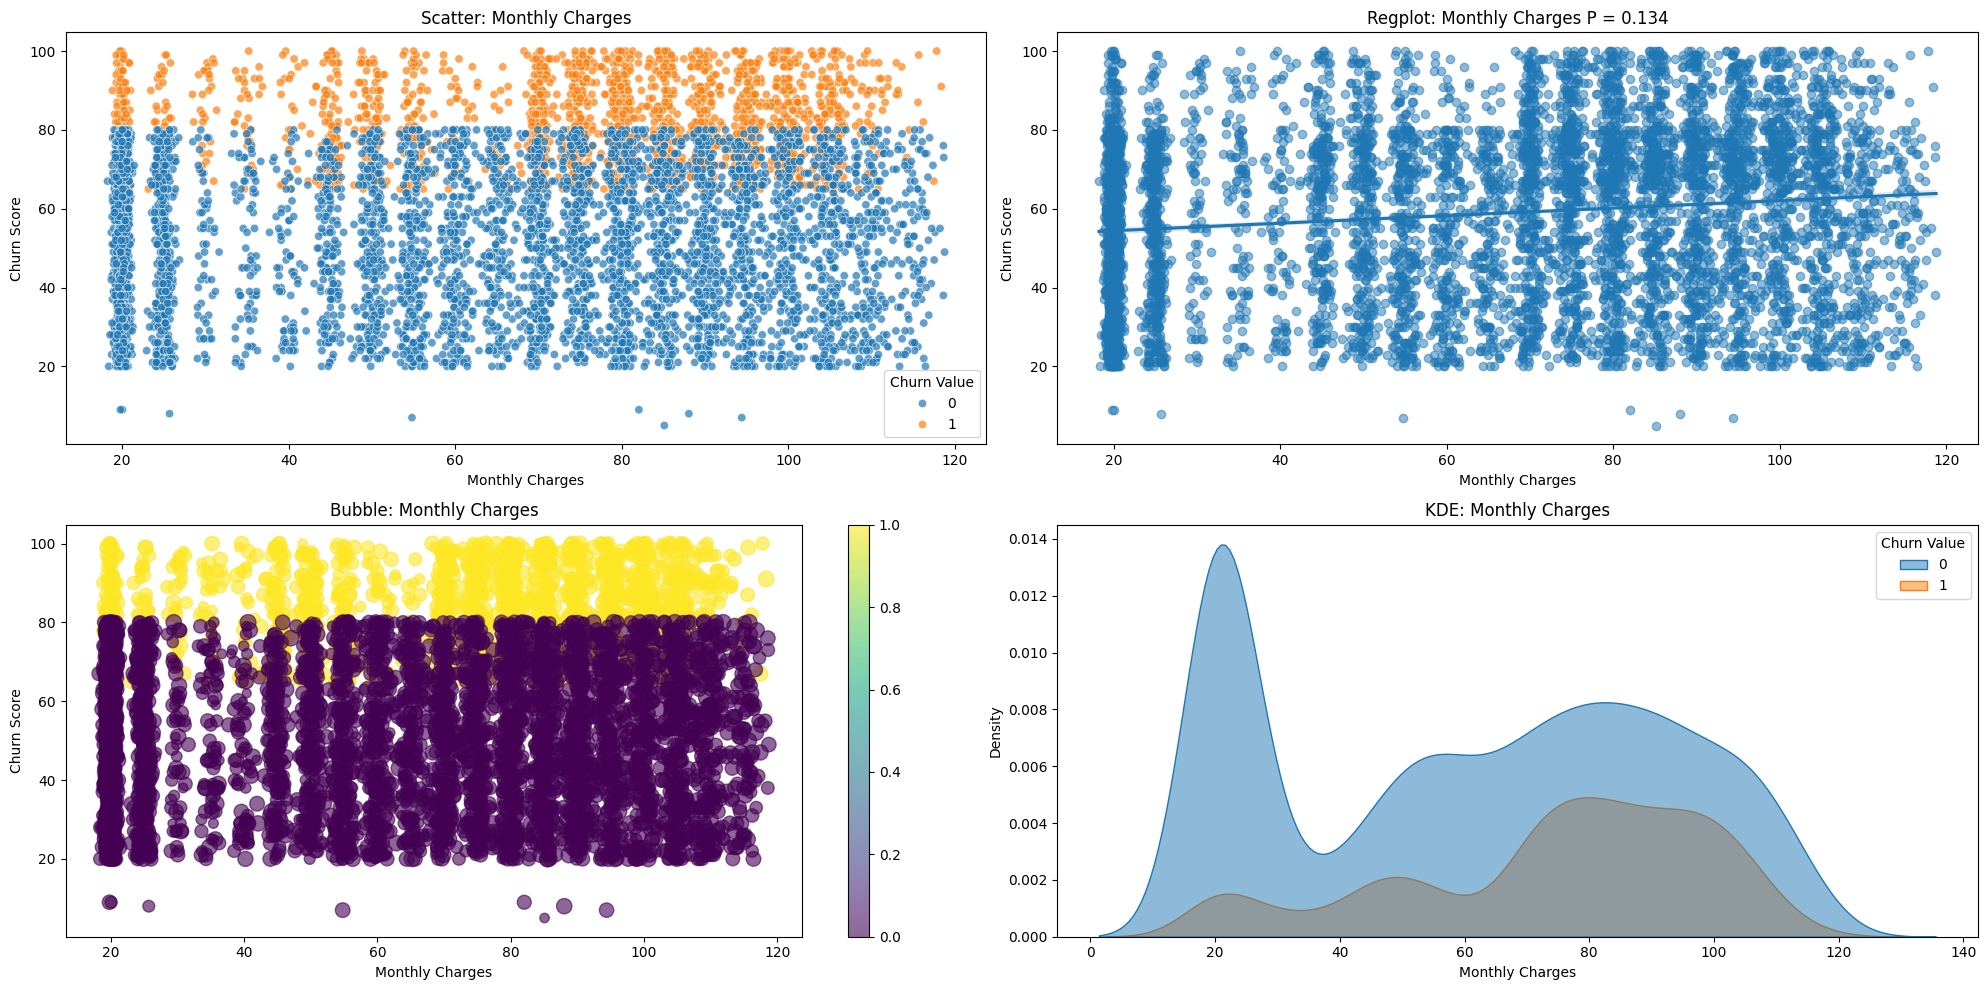

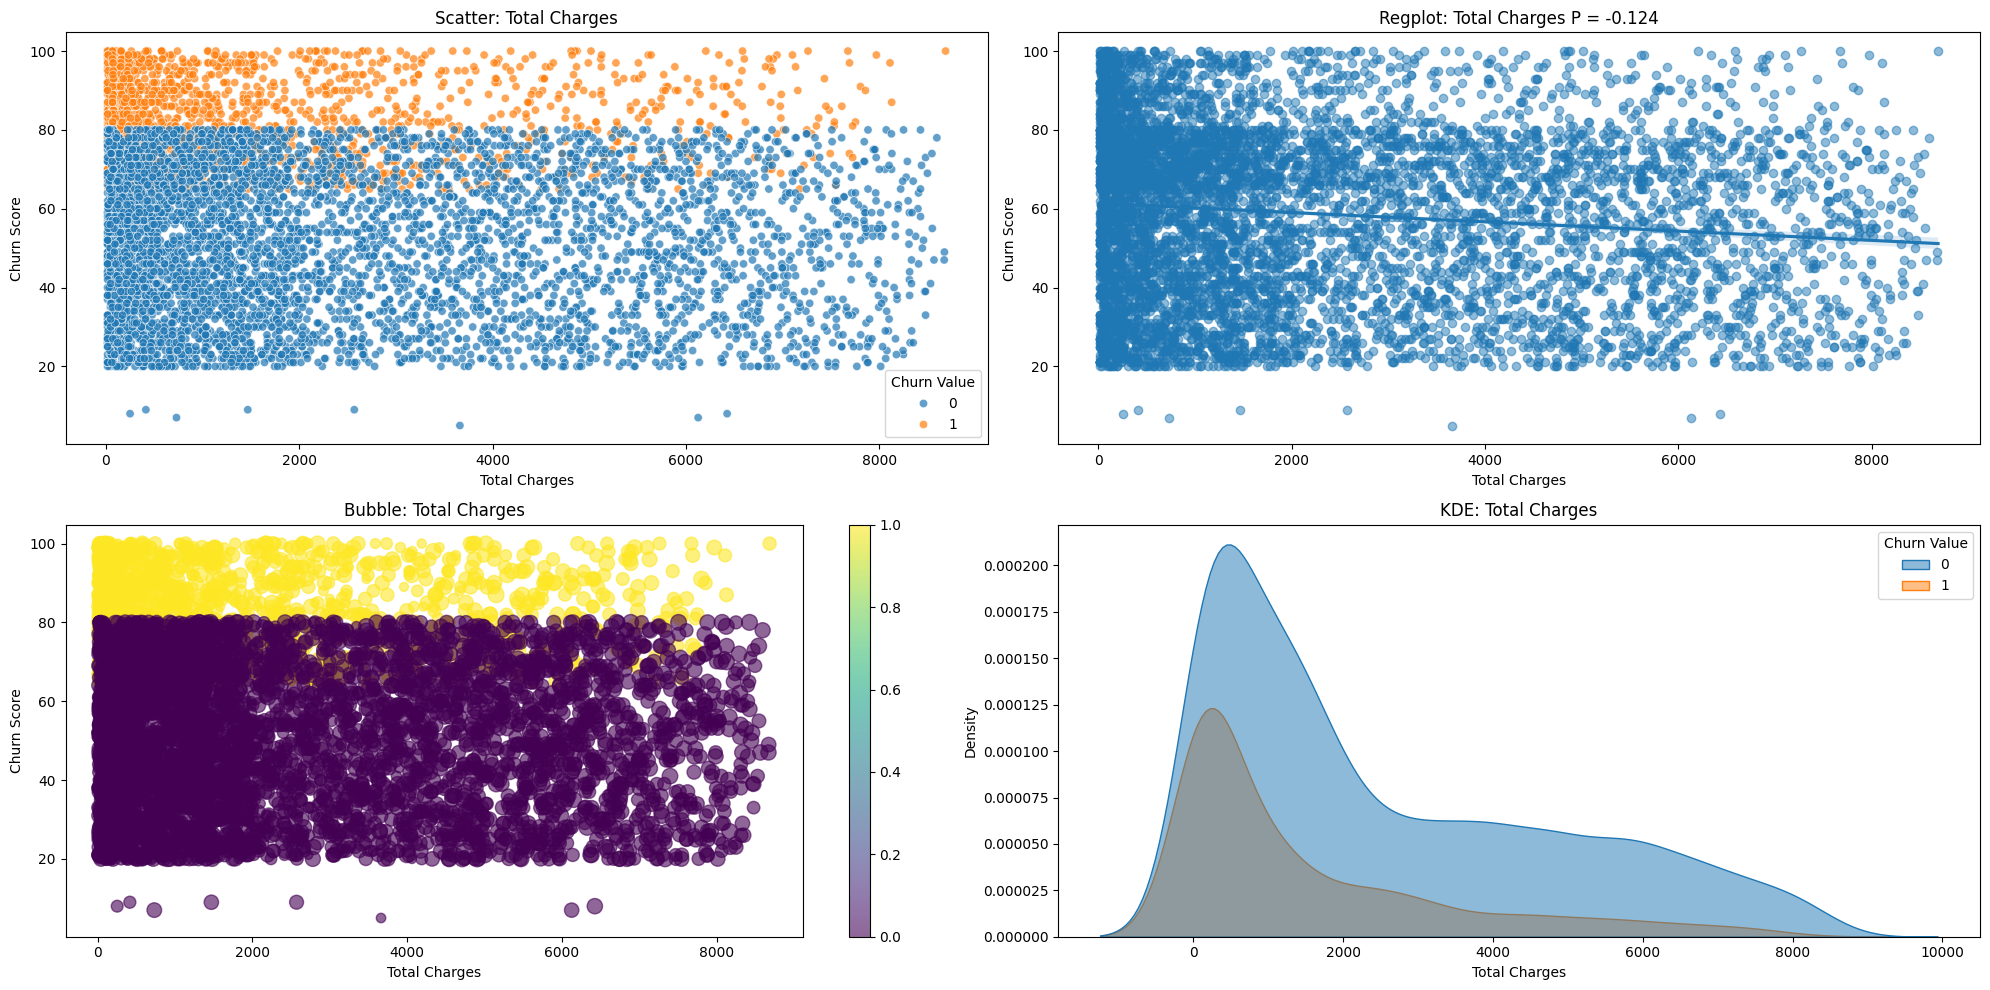

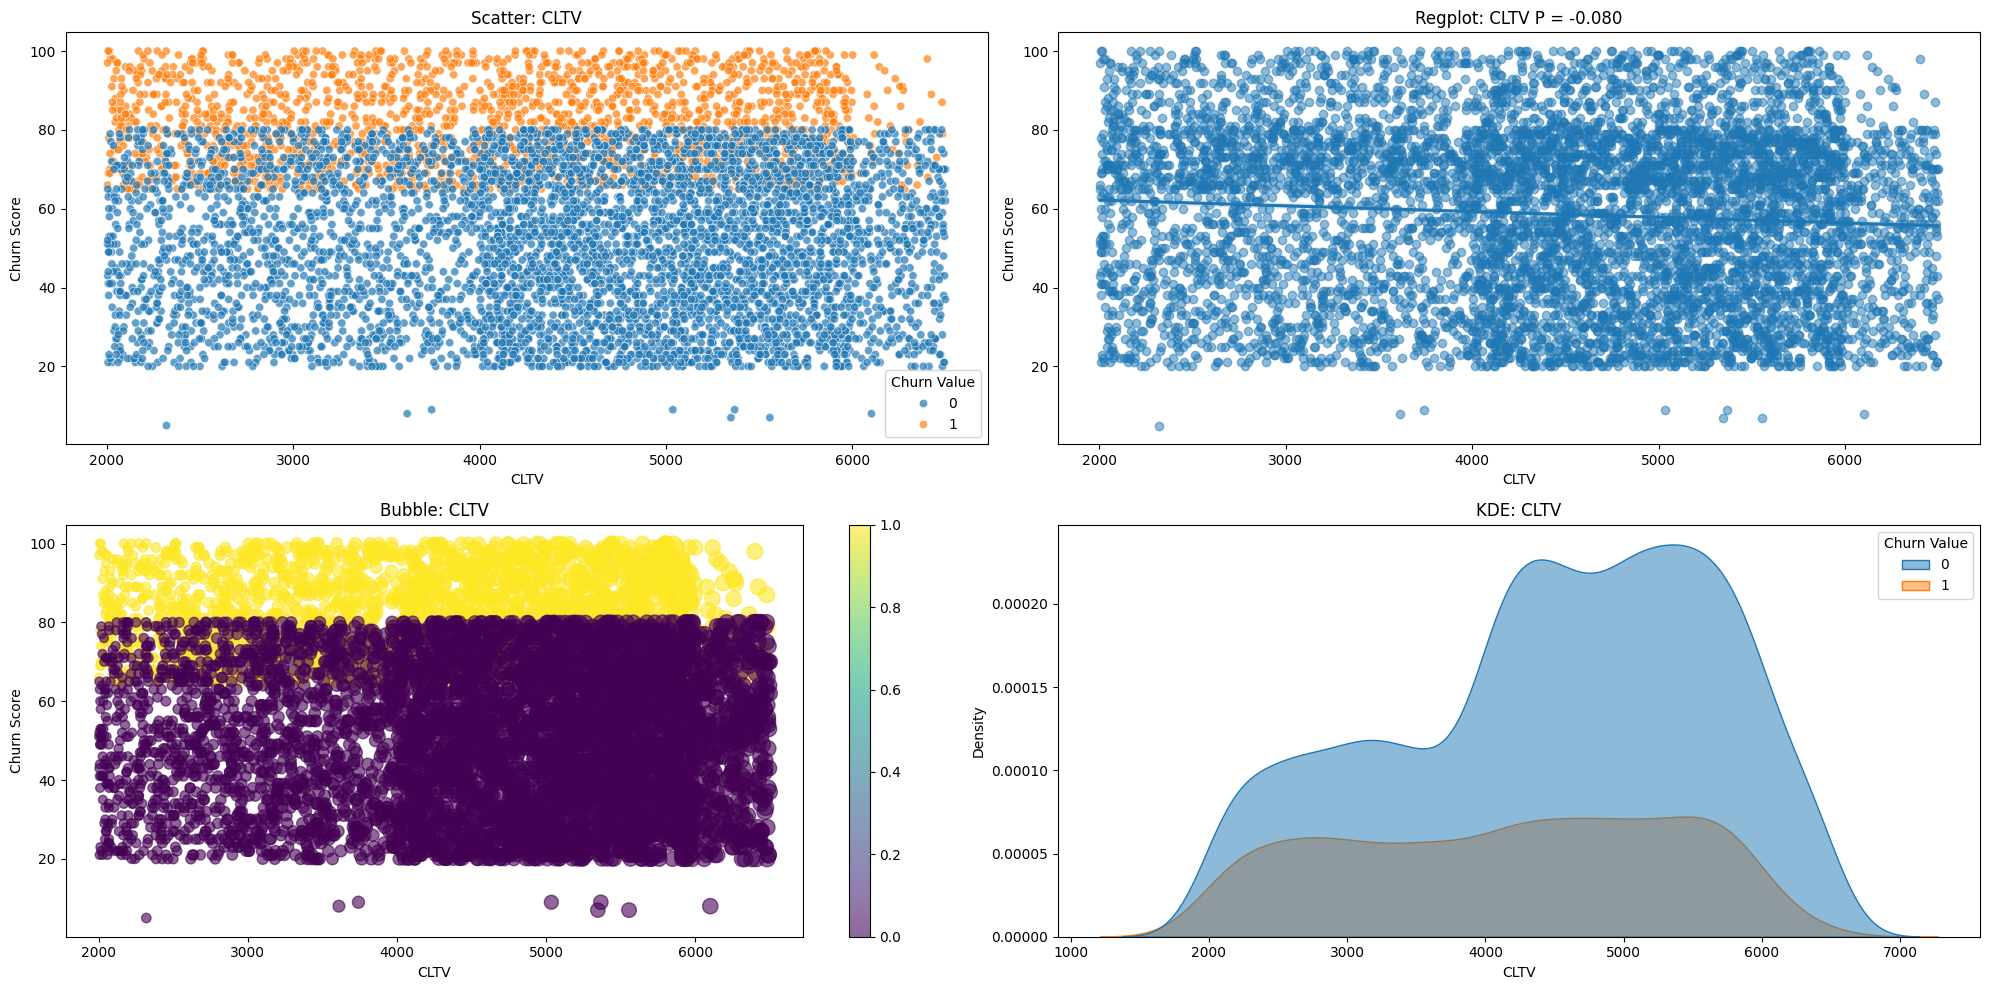

In [224]:
from scipy import stats

def build_beautiful(df, numeric_features, target_feature="Churn Score", hue_feature="Churn Value", size_feature="CLTV"):
    for feature in numeric_features:
        fig, axes = plt.subplots(2, 2, figsize=(20, 10))
        
        sns.scatterplot(data=df, x=feature, y=target_feature, hue=hue_feature, alpha=0.7, ax=axes[0,0])
        axes[0,0].set_title(f'Scatter: {feature}')
        
        sns.regplot(data=df, x=feature, y=target_feature, scatter_kws={'alpha':0.5}, ax=axes[0,1])
        corr, p_value = stats.pearsonr(df[feature].dropna(), df[target_feature].dropna())
        axes[0,1].set_title(f'Regplot: {feature} P = {corr:.3f}')
        
        scatter = axes[1,0].scatter(x=df[feature], y=df[target_feature], s=df[size_feature]/50, alpha=0.6, c=df[hue_feature], cmap='viridis')
        plt.colorbar(scatter, ax=axes[1,0])
        axes[1,0].set_xlabel(feature)
        axes[1,0].set_ylabel(target_feature)
        axes[1,0].set_title(f'Bubble: {feature}')
        
        sns.kdeplot(data=df, x=feature, hue=hue_feature, fill=True, alpha=0.5, ax=axes[1,1])
        axes[1,1].set_title(f'KDE: {feature}')
        
        plt.tight_layout()
        plt.show()

numeric_for_plots = [ 
    "Tenure Months",
    "Monthly Charges", 
    "Total Charges",
    "CLTV"
]
build_beautiful(df, numeric_for_plots)

## Продуктовые гипотезы

- целевая переменная бизнеса - CLTV (зависит напрямую от lifetime и среднего чека в месяц)

- Люди с дольшим контрактом менее вероятно уйдут от нас (нам выгоднее более долгий контракт)

- Если у пользователя подключена функция поддержки то он вероятнее останется с нами

- Возраст не является значимым признаком (доли примерно равные)

- Юзеры с защитой девайсов более вероятно останутся с нами

- Юзеры с очень высоким месяным платежом более вероятно нас покинут (графики показывают что от этого мы совсем не выиграемп)



## Data-гипотезы

- Необходима бинарная классификация с определением степени уверенности

- Данные линейно разделимы (надо проверить логистическую регрессию, SVM, случайный лес и градиентный бустинг)

- Можно пытаться кластеризовывать пользователей и предлагать кастомные предложения

- Для нас важнее Recall чем Precision

### Основные причины ухода пользователей
- совет друзей (контрится реферальной программой)

- лучшие условия у конкурента (контрится либо улучшением условий у нас, что может привести к убыткам, либо внедрение фичей, которые помогут удерживать юзеров)

- не знают (контрится добавлением интересных интеракций, геймификации, или опять же фичей)

# ML part

In [225]:
ml_df = pd.read_excel(
    "Telco_Churn.xlsx"
)
ml_df["Total Charges"] = pd.to_numeric(ml_df["Total Charges"], errors='coerce')
ml_df["Total Charges"].fillna(value=df["Total Charges"].median(), inplace=True)
ml_df["Churn Reason"].fillna(value=" ", inplace=True)

ml_df.head()

/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2215938706.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/2215938706.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges  \
0               Yes               Mailed check            53.85   
1               Yes           Electronic check            70.70   
2               Yes           Electronic check            99.65   
3               Yes           Electronic check           104.80   
4               Yes  Bank transfer (automatic)           103.70   

   Total Charges Churn Label  Churn Value  Churn Score  CLTV  \
0         108.15         Yes            1           86  3239   
1         151.65         Yes            1           67  2701   
2         820.50         Yes            1           86  5372   
3        3046.05         Yes            1           84  5003   
4        5036.30         Yes            1           89  5340   

                    Churn Reason  
0   Competitor made better offer  
1                          Moved  
2                          Moved  
3                          Moved  
4  Competitor had better devices

In [226]:
ml_df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [227]:
feature_columns = [
    "City",
    "Gender",
    "Senior Citizen",
    'Partner', 
    'Dependents', 
    'Tenure Months', 
    'Phone Service',
    'Multiple Lines', 
    'Internet Service', 
    'Online Security',
    'Online Backup', 
    'Device Protection', 
    'Tech Support', 
    'Streaming TV',
    'Streaming Movies', 
    'Contract', 
    'Paperless Billing', 
    'Payment Method',
    'Monthly Charges', 
    'Total Charges'
]
target_column = 'Churn Value'

In [247]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split


X = ml_df[feature_columns]
y = ml_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [248]:
X.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges'],
      dtype='object')

In [258]:
from sklearn.compose import ColumnTransformer

numeric_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']

categorical_features = [
    'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

log_reg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

logreg_params = {
    'model__C': [0.45, 0.5, 0.55, 3],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}

logreg_grid = GridSearchCV(
    estimator=log_reg_pipe,
    cv=5,
    param_grid=logreg_params,
    scoring="f1",
)

logreg_grid.fit(
    X_train, y_train
)

logreg_pred = logreg_grid.predict(
    X_test
)

logreg_proba = logreg_grid.predict_proba(X_test)[:, 1]

print("Logistic Regression:")
print(f"Best params: {logreg_grid.best_params_}")
print(f"F1: {f1_score(y_test, logreg_pred):.3f}")
print(f"Precision: {precision_score(y_test, logreg_pred):.3f}")
print(f"Recall: {recall_score(y_test, logreg_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, logreg_proba):.3f}")


Logistic Regression:
Best params: {'model__C': 0.5, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
F1: 0.612
Precision: 0.651
Recall: 0.578
ROC-AUC: 0.848


In [259]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

rf_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    cv=5,
    param_grid=rf_params,
    scoring="f1",
)

rf_grid.fit(X_train, y_train)

rf_pred = rf_grid.predict(X_test)
rf_proba = rf_grid.predict_proba(X_test)[:, 1]

print("Random Forest:")
print(f"Best params: {rf_grid.best_params_}")
print(f"F1: {f1_score(y_test, rf_pred):.3f}")
print(f"Precision: {precision_score(y_test, rf_pred):.3f}")
print(f"Recall: {recall_score(y_test, rf_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_proba):.3f}")

Random Forest:
Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
F1: 0.570
Precision: 0.654
Recall: 0.505
ROC-AUC: 0.840


In [260]:

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

gb_params = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}

gb_grid = GridSearchCV(
    estimator=gb_pipeline,
    cv=5,
    param_grid=gb_params,
    scoring="f1",
)

gb_grid.fit(X_train, y_train)

gb_pred = gb_grid.predict(X_test)
gb_proba = gb_grid.predict_proba(X_test)[:, 1]

print("Gradient Boosting:")
print(f"Best params: {gb_grid.best_params_}")
print(f"F1: {f1_score(y_test, gb_pred):.3f}")
print(f"Precision: {precision_score(y_test, gb_pred):.3f}")
print(f"Recall: {recall_score(y_test, gb_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, gb_proba):.3f}")

Gradient Boosting:
Best params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
F1: 0.592
Precision: 0.643
Recall: 0.548
ROC-AUC: 0.847


In [263]:

sgd_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SGDClassifier(random_state=42))
])

sgd_params = {
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__max_iter': [1000, 2000]
}

sgd_grid = GridSearchCV(
    estimator=sgd_pipeline,
    cv=5,
    param_grid=sgd_params,
    scoring="f1",
)

sgd_grid.fit(X_train, y_train)

sgd_pred = sgd_grid.predict(X_test)


print("SGD Classifier:")
print(f"Best params: {sgd_grid.best_params_}")
print(f"F1: {f1_score(y_test, sgd_pred):.3f}")
print(f"Precision: {precision_score(y_test, sgd_pred):.3f}")
print(f"Recall: {recall_score(y_test, sgd_pred):.3f}")


SGD Classifier:
Best params: {'model__alpha': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l1'}
F1: 0.597
Precision: 0.672
Recall: 0.537


In [264]:
import joblib
joblib.dump(logreg_grid.best_estimator_, 'lrm.joblib')

['lrm.joblib']